### 1. Введение

✍ Рады приветствовать вас во втором модуле, посвящённом линейной алгебре!

В предыдущем модуле мы познакомились с базовыми понятиями линейной алгебры. По сути, мы изучили основы матричного языка и теперь можем на нем говорить. 

В этом модуле мы перейдём к применению линейной алгебры в машинном обучении и рассмотрим алгоритмы анализа данных с разных сторон. В основном мы, конечно, будем говорить о модели линейной регрессии и её модификациях.

Мы будем использовать весь математический аппарат, который изучили в прошлом модуле. Темы предстоят очень интересные, но в то же время непростые. Для того чтобы усвоить их, необходимо владеть всеми навыками, приобретёнными в предыдущем модуле — от базовых операций над векторами до знания принципов решения СЛАУ. Давайте проверим, насколько вы готовы ↓

**Задание 1.1**

Найдите скалярное произведение векторов:

$\vec{v_{1}}  = (-1, 2, \ -7, 9)^T$
$\vec{v_{2}}  = (2, 8, 2, \ -1)^T$

In [2]:
import numpy as np
v1 = np.array([-1, 2, -7, 9])  
v2 = np.array([2, 8, 2, -1])  
G = np.dot(v1.T, v2.T)
G

-9

**Задание 1.4**

Задана матрица

<img src="data\MATHML_md2_1_1.png" alt="drawing" width="100"/>

Найдите матрицу Грама $A^{T}A$.

In [3]:
A = np.matrix ("1, 1; 1, 2")
G = np.dot(A.T, A)
G

matrix([[2, 3],
        [3, 5]])

**Задание 1.6**

Вычислите обратную матрицу $A^{-1}$, если:  
<img src="data\MATHML_md2_1_4.png" alt="drawing" width="100"/>

In [4]:
A = np.matrix ("1, 2; 3, 7")
print(np.linalg.inv(A))

[[ 7. -2.]
 [-3.  1.]]


**Задание 1.7**

Найдите ранг матрицы системы, составленной из векторов:

$\vec{v_{1}}  = (2, 10, \ -2)^T$  
$\vec{v_{2}}  = (3, 2, \ -2)^T$  
$\vec{v_{3}}  = (8, 14, \ -6)^T$  

In [5]:
import numpy as np
v1 = np.array([2,10,-2])
v2 = np.array([3,2,-2])
v3 = np.array([8,14,-6])
A = np.array([v1, v2, v3]).T
print(np.linalg.matrix_rank(A))

2


Итак, второй модуль, посвящённый линейной алгебре, будет состоять **из двух частей**:

**В первой части** мы будем говорить о **классической модели линейной регрессии**. Для этого мы вернёмся к неоднородным системам линейных алгебраических уравнений, которые мы затронули в прошлом модуле, и посмотрим, как они связаны с **методом наименьших квадратов** (МНК, или OLS, Ordinary Least Squares). Затем мы с математической точки зрения посмотрим на проблемы, которые возникают при его использовании, например мультиколлинеарность или чересчур большое количество факторов.

**Во второй части** мы перейдём к модификациям модели линейной регрессии и посмотрим, как линейная алгебра работает в **полиномиальной регрессии**, а также поговорим о том, как работают методы регуляризации на математическом уровне.

В конце каждого из блоков нас ожидает небольшая **практическая задача** на применение регрессионных моделей.

Сразу отметим, что **мы не будем рассматривать следующие вопросы**:

- Вероятностные предпосылки использования модели линейной регрессии, необходимые для её валидности (данные предпосылки регламентирует теорема Маркова-Гаусса).
- Оценки качества полученной регрессионной модели и оценки статистической значимости её коэффициентов.
- Статистические методы предварительной обработки данных.
Для изучения этих вопросов понадобятся знания в области теории вероятности и статистики. Мы обязательно обсудим их в следующих модулях. А пока нас интересуют подробности построения вычислительных алгоритмов с точки зрения линейной алгебры.

- Также мы не будем затрагивать тему корректной валидации моделей и разделять выборку на тренировочную/тестовую/валидационную с целью экономии времени и сил. Надеемся, что вы помните, как правильно оценивать качество получаемых моделей, сможете проделать это самостоятельно.
Таким образом, мы будем рассматривать **только математическую составляющую** линейных (и полиномиальных) моделей регрессии, не концентрируясь на сторонних аспектах машинного обучения.

**ЦЕЛИ ДАННОГО МОДУЛЯ:**

- познакомиться с неоднородными СЛАУ и случаями их решений;
- изучить математическую формализацию метода наименьших квадратов;
- научиться строить модель линейной регрессии с помощью МНК;
- понять, какие проблемы возникают в МНК с математической точки зрения;
- познакомиться с математической формализацией полиномиальной регрессии;
- рассмотреть методы регуляризации и принципы их работы.  
Готовы? Тогда начинаем →

_________________________

### 2. Неоднородные СЛАУ

✍ Мы начнём с алгоритма классической линейной регрессии по методу наименьших квадратов (OLS, Ordinary Least Squares). Данный алгоритм является базовым, но, тем не менее, весьма непрост для восприятия, поэтому данная сложносочинённая задача будет разделена на две части:

В этом юните мы обсудим случаи и алгоритм решения неоднородных СЛАУ.
В следующем юните подведём под эту задачу контекст задачи регрессии.
Для начала давайте вспомним, что такое неоднородные СЛАУ.

**Примечание**. Совокупность уравнений первой степени, в которых каждая переменная и коэффициенты в ней являются вещественными числами, называется **системой линейных алгебраических уравнений (СЛАУ)** и в общем случае записывается как:

$\left\{ \begin{array}{c} a_{11}x_1+a_{12}x_2+\dots +a_{1m}x_m=b_1 \\ a_{21}x_1+a_{22}x_2+\dots +a_{2m}x_m=b_2 \\ \dots \\ a_{n1}x_1+a_{n2}x_2+\dots +a_{nm}x_m=b_n \end{array} \right.\ (1)$,   
где

$n$ — количество уравнений;  
$m$ — количество переменных;  
$x_i$ — неизвестные переменные системы;  
$a_{ij}$ — коэффициенты системы;  
$b_i$ — свободные члены системы.    
СЛАУ (1) называется **однородной**, если все свободные члены системы равны $0 b_1=b_2=⋯=b_n=0:$  

$\textrm{С}\textrm{Л}\textrm{А}\textrm{У}-\textrm{о}\textrm{д}\textrm{н}\textrm{о}\textrm{р}\textrm{о}\textrm{д}\textrm{н}\textrm{а}\textrm{я},\ \textrm{е}\textrm{с}\textrm{л}\textrm{и}\ \forall b_i=0  $
СЛАУ (1) называется **неоднородной**, если хотя бы один из свободных членов системы отличен от 0:

$\textrm{С}\textrm{Л}\textrm{А}\textrm{У}-\textrm{н}\textrm{е}\textrm{о}\textrm{д}\textrm{н}\textrm{о}\textrm{р}\textrm{о}\textrm{д}\textrm{н}\textrm{а}\textrm{я},\ \textrm{е}\textrm{с}\textrm{л}\textrm{и}\ \exists b_i\neq 0 $  
Пример неоднородной СЛАУ:

$\left\{\begin{array}{c} w_{1}+w_{2}=1 \\ w_{1}+2 w_{2}=2 \end{array}\right.$    

Вспомним, что СЛАУ можно записать в матричном виде:

<img src="data\MATHML_md2_2_3.png" alt="drawing" width="400"/>

где $A$ — матрица системы, $w$ — вектор неизвестных коэффициентов, а $b$ — вектор свободных коэффициентов. 

Давайте введём новое для нас определение.

**Расширенной матрицей системы (A|b) неоднородных СЛАУ** называется матрица, составленная из исходной матрицы и вектора свободных коэффициентов (записывается через вертикальную черту):

$(A \mid \vec{b})=\left(\begin{array}{cccc|c} a_{11} & a_{12} & \ldots & a_{1 m} & b_{1} \\ a_{21} & a_{22} & \ldots & a_{2 m} & b_{2} \\ \ldots & \ldots & \ldots & \ldots & \ldots \\ a_{n 1} & a_{n 2} & \ldots & a_{n m} & b_{n} \end{array}\right)$  
Расширенная матрица системы — это обычная матрица. Черта, отделяющая коэффициенты $a_{ij}$ от свободных членов $b_{i}$ — чисто символическая. 

Над расширенной матрицей неоднородной СЛАУ можно производить те же самые действия, что и над обычной, а именно:

складывать/вычитать между собой строки/столбцы матрицы;
умножать строки/столбцы на константу;
менять строки/столбцы местами.
Приведём пример расширенной матрицы системы. Пусть исходная система будет следующей:

$\left\{\begin{array}{c} w_{1}+w_{2}=1 \\ w_{1}+2 w_{2}=2 \end{array}\right.$  
Запишем её в матричном виде:



<img src="data\MATHML_md2_2_6.png" alt="drawing" width="250"/>

Тогда расширенная матрица системы будет иметь вид:

<img src="data\MATHML_md2_2_7.png" alt="drawing" width="250"/>

Теперь, когда мы вспомнили все определения и познакомились с термином расширенной матрицы, мы можем переходить к решению неоднородных СЛАУ.

Существует три случая при решении неоднородных СЛАУ:

- **«Идеальная пара»**

Это так называемые определённые системы линейных уравнений, имеющие единственные решения.

- **«В активном поиске»**

Неопределённые системы, имеющие бесконечно много решений.

- **«Всё сложно»**

Это самый интересный для нас случай — переопределённые системы, которые не имеют точных решений.

**Примечание**. В данной классификации неоднородных СЛАУ допущено упрощение в терминологии. На самом деле неопределённые системы — это те, в которых независимых уравнений меньше, чем неизвестных. Они могут иметь бесконечно много решений (быть совместными) или ни одного решения (быть несовместными, если уравнения противоречат друг другу).

На практике, например в обучении регрессий, этот случай практически не встречается.

Что касается переопределённых систем, то в них, помимо несовместности (отсутствия решений), количество независимых уравнений превышает количество неизвестных — это тот самый случай, что мы видим в регрессионном анализе.

Далее мы рассмотрим каждый из случаев на примере.

### СЛУЧАЙ «ИДЕАЛЬНАЯ ПАРА»

Самый простой случай решения неоднородной СЛАУ — когда система имеет единственное решение. Такие системы называются **совместными**.

На вопрос о том, когда СЛАУ является совместной, отвечает главная теорема СЛАУ — теорема Кронекера — Капелли (также её называют **критерием совместности системы**).

**Теорема Кронекера — Капелли**:

Неоднородная система линейный алгебраических уравнений $A \vec{w} = \vec{b}$ является совместной тогда и только тогда, когда ранг матрицы системы A равен рангу расширенной матрицы системы $(A|\vec{b})$ и равен количеству независимых переменных $m$:

$rk(A) = rk(A|\vec{b}) = m \leftrightarrow \exists ! \vec{w} = (w_{1}, w_{2}, \ldots w_m)^T$
Причём решение системы будет равно:

$\vec{w} = A^{-1} \vec{b}$

**Примечание**. Здесь значок $\exists !$ переводится как «существует и причём единственное».

Сложно и непонятно? Давайте разберёмся, как работает эта теорема, на примерах ↓

? Дана СЛАУ:

<img src="data\MATHML_md2_2_8.png" alt="drawing" width="150"/>

где w_1 и w_2 — неизвестные переменные.

При решении системы «в лоб» получим:

<img src="data\MATHML_md2_2_9.png" alt="drawing" width="450"/>

Интерпретация:

<img src="data\MATHML_md2_2_10.png" alt="drawing" width="300"/>

На языке линейной алгебры это означает что вектор $(1, 2)^T$ линейно выражается через векторы коэффициентов системы (1,1)^T и (1,2)^T.

В матричном виде система запишется, как:


<img src="data\MATHML_md2_2_11.png" alt="drawing" width="450"/>

Преобразование уравнений будем таким же, как и при преобразовании расширенной матрицы системы (A|\vec{b}), вычитая сначала первую строку из второй, а затем — результат из первой, получим то же решение, что и решение «в лоб».

<img src="data\MATHML_md2_2_12.png" alt="drawing" width="600"/>

Других решений у системы нет. 

Посмотрим на ранги матрицы А и расширенной матрицы $(A|\vec{b})$ (количество ступеней в ступенчатых матрицах):

<img src="data\MATHML_md2_2_13.png" alt="drawing" width="300"/>

Они совпадают и равны количеству неизвестных, а это и гарантирует существование и единственность решения. То есть в общем случае, чтобы узнать, сколько решений существует у системы, её необязательно было бы решать — достаточно было бы найти ранги матриц A и (A | b).

? Тут возникает вопрос: «Можно ли найти решение одной формулой?»

Для удобства перепишем систему без стрелок:

$Aw = b$
Так как матрица квадратная и невырожденная, у неё обязательно есть обратная матрица.

Умножим на $A^{-1}$ слева обе части уравнения. Стоит напомнить, что произведение матриц не перестановочно, поэтому есть разница, с какой стороны умножать.

$A^{-1} Aw = A^{-1}b$  
$w = A^{-1} b$  
**Важно**! Отсюда явно видны **ограничения** этого метода: его можно применять только для квадратных невырожденных матриц (тех, у которых определитель не равен 0).

Убедимся в правильности формулы. Найдём произведение матрицы $A^{-1}$ и вектора-столбца $b$:

<img src="data\MATHML_md2_2_14.png" alt="drawing" width="450"/>

**Резюмируем**↓

У нас есть квадратная система с m неизвестных. Если ранг матрицы коэффициентов $A$ **равен** рангу расширенной матрицы $(A | b)$ и **равен** количеству переменных $(rk(A)=rk(\vec{b})=m)$, то в системе будет ровно столько независимых уравнений, сколько и неизвестных $m$, а значит будет единственное решение.

Вектор свободных коэффициентов $b$ при этом линейно независим со столбцами матрицы $A$, его разложение по столбцам $A$ единственно.

**Задание 2.4**

Решите систему линейных уравнений:  

<img src="data\MATHML_md2_2_23.png" alt="drawing" width="200"/>

In [6]:
A = np.matrix ("4, 7; 5, 10")
b = np.array([20, 30])
w = np.dot(np.linalg.inv(A), b.T)
w


matrix([[-2.,  4.]])

### СЛУЧАЙ «В АКТИВНОМ ПОИСКЕ»

? А что, если система не удовлетворяет теореме Кронекера — Капелли? То есть ранг матрицы системы равен расширенному рангу матрицы, но не равен количеству неизвестных. Неужели тогда система нерешаема?

На этот вопрос отвечает первое следствие из теоремы ↓

**Следствие №1 из теоремы Кронекера — Капелли**:

Если ранг матрицы системы A равен рангу расширенной матрицы системы $(A|\vec{b})$, но меньше, чем количество неизвестных m, то система имеет бесконечное множество решений:

$rk(A) = rk(A | \vec{b}) < m  \leftrightarrow  \infty \ решений $

? Решим систему уравнений:

$w_1 + w_2 + w_3 = 10$

Да, уравнение одно, но формально оно является неоднородной СЛАУ.

Итак, мы имеем одно уравнение на три неизвестных, значит две координаты из трёх вектора w мы можем задать как угодно. Например, зададим вторую и третью как $\alpha$ и $\beta$. Тогда первая будет равна $10 - \alpha - \beta.$

<img src="data\MATHML_md2_2_30.png" alt="drawing" width="300"/>

Вместо переменных $\alpha$ и $\beta$ мы можем подставлять любые числа и всегда будем получать равенство. 

Составим расширенную матрицу:

<img src="data\MATHML_md2_2_31.png" alt="drawing" width="250"/>

Её ранг, как и ранг A, равен 1, что меньше числа неизвестных $m=3$:

$rk(A) = rk(A | \vec{b}) = 1 < 3$
Такая ситуация, по следствию из теоремы Кронекера — Капелли, говорит о существовании и не единственности решения, то есть решений бесконечно много.

**Резюмируем** ↓

Если ранги матриц $A$ и $(A|\vec{b})$ всё ещё совпадают, но уже меньше количества неизвестных $(rk(A) = rk(A | \vec{b}) < m)$, значит, уравнений не хватает для того, чтобы определить систему полностью, и решений будет бесконечно много.

На языке линейной алгебры это значит, что вектор $\vec{b}$ линейно зависим со столбцами матрицы A, но также и сами столбцы зависимы между собой, поэтому равнозначного разложения не получится, т. е. таких разложений может быть сколько угодно.

**Задание 2.6**

Сколько решений имеет представленная ниже система уравнений?

<img src="data\MATHML_md2_2_37.png" alt="drawing" width="250"/>

In [7]:
A = np.matrix ("4, 7, -1; -4, 2, 5; 0, 9, 4")
Ab = np.matrix ("4, 7, -1, 7; -4, 2, 5, 3; 0, 9, 4, 10")
print(np.linalg.matrix_rank(A))
print(np.linalg.matrix_rank(Ab))

2
2


### СЛУЧАЙ «ВСЁ СЛОЖНО»

А теперь посмотрим на самый интересный для нас случай. Его формально регламентирует второе следствие из теоремы Кронекера — Капелли.

**Следствие №2 из теоремы Кронекера — Капелли**:

Если ранг матрицы системы $A$ меньше, чем ранг расширенной матрицы системы $(A|\vec{b})$, то система несовместна, то есть не имеет точных решений:

$rk(A)  < rk(A | \vec{b})  \leftrightarrow  \nexists \ решений$

? Решим систему уравнений:

<img src="data\MATHML_md2_2_42.png" alt="drawing" width="200"/>

Посмотрим на первое и третье уравнение — очевидно, что такая система не имеет решений, так как данные уравнения противоречат друг другу.

Но давайте обоснуем это математически. Для этого запишем расширенную матрицу системы:

<img src="data\MATHML_md2_2_43.png" alt="drawing" width="200"/>

Посчитаем ранги матриц $A$ и $(A|\vec{b})$:

<img src="data\MATHML_md2_2_44.png" alt="drawing" width="600"/>

Итак, $rk(A)=2$, в то время как $rk(A|\vec{b})=3$. Это и есть **критерий переопределённости** системы уравнений: ранг матрицы системы меньше ранга расширенной матрицы системы.

→ Получается, что идеальное решение найти нельзя, но чуть позже мы увидим, что такие системы возникают в задачах регрессии практически всегда, а значит нам всё-таки хотелось бы каким-то образом её решать. Можно попробовать найти приблизительное решение — вопрос лишь в том, какое из всех этих решений лучшее.

? Найдем наилучшее приближение для $w_1$, $w_2$, если:

<img src="data\MATHML_md2_2_45.png" alt="drawing" width="400"/>

Обозначим приближённое решение как $\hat{w}.$ Приближением для вектора b будет $\hat{b} = A \hat{w}.$ Также введём некоторый вектор ошибок $e = b - \hat{b} = b - A \hat{w}.$

**Примечание.** Здесь мы снова опустили стрелки у векторов $b$, $\hat{b}$ и $\hat{w}$ для наглядности.

Например, если мы возьмём в качестве вектора $\hat{w}$ вектор $\hat{w}_1=(1, 1)^T$, то получим:

<img src="data\MATHML_md2_2_46.png" alt="drawing" width="400"/>

Теперь возьмём в качестве вектора $\hat{w}_2 = (4, -1)^T$, получим:

<img src="data\MATHML_md2_2_47.png" alt="drawing" width="400"/>

→ Конечно, нам хотелось бы, чтобы ошибка была поменьше. Но какая из них поменьше? Векторы сами по себе сравнить нельзя, но зато можно сравнить их длины.

Для первого случая будем иметь:

$\left\|e_1 \right\| = \sqrt{(-1)^2 + (-1)^2 + (10)^2} = \sqrt{102}$
Для второго случая:

$\left\|e_2 \right\| = \sqrt{(-2)^2 + 0^2 + 9^2} = \sqrt{85}$
Видно, что вторая ошибка всё-таки меньше, соответственно, приближение лучше. Но в таком случае из всех приближений нам нужно выбрать то, у которого длина вектора ошибок минимальна, если, конечно, это возможно.

$\left\|e \right\| \rightarrow min$
Мы вернёмся к этой задаче чуть позже, а пока выполните несколько заданий на проверку понимания второго следствия теоремы Кронекера — Капелли ↓

Вернёмся к задаче поиска оптимальных приближений вектора $\hat{w}$.

**Примечание**. Проблема поиска оптимальных приближённых решений неоднородных переопределённых СЛАУ стояла у математиков вплоть до XIX века. До этого времени математики использовали частные решения, зависящие от вида уравнений и размерности. Впервые данную задачу для общего случая решил Гаусс, опубликовав метод решения этой задачи, который впоследствии будет назван **методом наименьших квадратов (МНК)**. В дальнейшем Лаплас прибавил к данному методу теорию вероятности и доказал оптимальность МНК-оценок с точки зрения статистики.

Сейчас мы почувствуем себя настоящими математиками и попробуем решить эту задачу самостоятельно с помощью простой геометрии и знакомых нам операций над матрицами.

Вспомним, что на языке линейной алгебры неразрешимость системы

<img src="data\MATHML_md2_2_48.png" alt="drawing" width="250"/>

означает, что попытка выразить вектор $(1, 2, 12)^T$ через $(1, 1, 1)^T$ и $(1,2,1)^T$ не будет успешной, так как они линейно независимы.

Геометрически это означает, что вектор свободных коэффициентов $b$ (коричневый) не лежит в одной плоскости со столбцами матрицы $A$ (синие векторы).

<img src="data\MATHML_md2_2_49.png" alt="drawing" width="550"/>

→ Напомним, что подобную задачу мы решали в предыдущем модуле по линейной алгебре, в юните «Практика: векторы». Вы можете вернуться в предыдущий модуль и освежить в памяти решение задачи.

Идея состояла в том, что наилучшим приближением для коричневого вектора будет ортогональная проекция на синюю плоскость — голубой вектор. Так происходит потому, что наименьший по длине вектор ошибок — красный — должен быть перпендикулярен к синей плоскости:

$e = b - \hat{b}$

В прошлом модуле мы производили расчёты интуитивно, а теперь настала пора вывести формулу.

Давайте умножим наши уравнения слева на $A^T$:

<img src="data\MATHML_md2_2_50.png" alt="drawing" width="350"/>

Идея заключается в следующем: справа мы найдём скалярное произведение столбцов матрицы A на вектор b, а слева — произведение столбцов A на приближённый вектор $\hat{b}$ (по сути, на голубую проекцию).

<img src="data\MATHML_md2_2_71.png" alt="drawing" width="200"/>

Упростим уравнение, перемножив всё, что содержит только числа. В левой части умножим $A^T$ на $A$, в правой — умножим $A^T$ на $b$. Тогда слева получим матрицу 2×2 — это не что иное, как матрица Грама столбцов A.

Столбцы $A$ линейно независимы, а это значит, что, по свойству матрицы Грама, $A^{T} \cdot A$  — невырожденная квадратная матрица (её определитель не равен нулю, и для неё существует обратная матрица). Получившаяся система — один в один случай «идеальная пара» (ранг матрицы, как и ранг расширенной матрицы, равен 2, в чём несложно убедиться), а это значит, что теперь мы можем её решить.

<img src="data\MATHML_md2_2_51.png" alt="drawing" width="450"/>

? Но ведь мы не могли решить изначальную задачу, так как она была переопределена, а эту — можем. Как так получилось?

Мы потребовали, чтобы у приближения $\hat{b}$ были с векторами $(1, 1, 1)^T$ и $(1, 2, 1)^T$ такие же скалярные произведения, как у $b$. Это и означает что $\hat{b}$ — ортогональная проекция на нашу синюю плоскость, в которой лежат столбцы матрицы A, и в этой плоскости мы можем найти коэффициенты.

Мы с вами отлично умеем решать системы типа «Идеальная пара». Для этого нам нужно найти обратную матрицу $(A^{T}A)^{-1}$ и умножить на неё слева всё уравнение. Так мы и получим наше приближение:

<img src="data\MATHML_md2_2_52.png" alt="drawing" width="250"/>

Находим определитель матрицы $(A^{T} A)$:

$det(A^T A) = 3 \cdot 6 - 4 \cdot 4 = 2$

Находим обратную матрицу $(A^{T}A)^{-1}$:

<img src="data\MATHML_md2_2_53.png" alt="drawing" width="550"/>

Умножаем всё уравнение на обратную матрицу слева:

<img src="data\MATHML_md2_2_54.png" alt="drawing" width="400"/>

И, наконец, вот он — долгожданный приближённый вектор $\hat{w}$:

<img src="data\MATHML_md2_2_55.png" alt="drawing" width="400"/>

Ещё раз посмотрим на финальную формулу:

<img src="data\MATHML_md2_2_56.png" alt="drawing" width="250"/>

⭐ Пришло время открытий!

Только что мы геометрическим образом вывели формулу оценки решения методом наименьших квадратов (МНК или OLS, Ordinary Least Squares).

**Примечание**. Стоит отметить, что полученная матричная формула не зависит от размерностей и конкретных значений, а значит применима не только в нашем локальном случае, но и в общем.

Нам осталось выполнить проверку полученных результатов, чтобы убедиться в верности решения.

Вычислим голубой вектор $\hat{b}$. Для этого возьмём линейную комбинацию столбцов матрицы А с найденными нами коэффициентами $\hat{w}_1$ и $\hat{w}_2$:

<img src="data\MATHML_md2_2_57.png" alt="drawing" width="550"/>

Вычислим вектор ошибок e:

<img src="data\MATHML_md2_2_58.png" alt="drawing" width="400"/>

Убедимся, что данный вектор действительно ортогонален столбцам матрицы А. Для этого найдём их скалярные произведения:

<img src="data\MATHML_md2_2_59.png" alt="drawing" width="500"/>

<img src="data\MATHML_md2_2_60.png" alt="drawing" width="500"/>

Скалярные произведения равны 0, а это означает, что вектор ошибок e действительно ортогонален всей синей плоскости, а голубой вектор $\hat{b}$ приближённого значения является ортогональной проекцией коричневого вектора $b$.

**Примечание**. Прежде чем перейти к выводам, стоит отметить, что обычно OLS-оценку выводят немного иначе, а именно минимизируя в явном виде длину вектора ошибок по коэффициентам $\hat{w}$, вернее, даже квадрат длины для удобства вычисления производных.

$\left\|\vec{e} \right\| \rightarrow min
\left\|\vec{e} \right\|^2 \rightarrow min
\left\|\vec{b} - A \vec{w} \right\|^2 \rightarrow min$
Формула получится точно такой же, какая есть у нас, просто способ вычислений будет не геометрический, а аналитический. Мы вернёмся к этому способу, когда будем обсуждать оптимизацию функции многих переменных в разделе по математическому анализу.

Наконец, мы может подвести итоги для случая «Всё сложно».

**Резюмируем** ↓

Если ранг матрицы A меньше ранга расширенной системы $(A|\vec{b})$, то независимых уравнений больше, чем переменных $(rkA<(A|\vec{b})<m)$, а значит некоторые из них будут противоречить друг другу, то есть решений у системы нет.

Говоря на языке линейной алгебры, вектор $b$ линейно независим со столбцами матрицы $A$, а значит его нельзя выразить в качестве их линейной комбинации.  

Однако можно получить приближённые решения по методу наименьших квадратов (OLS-оценка - $\hat{b} = (A^{T}A)^{-1}\cdot A^{T} b$), идеей которого является ортогональная проекция вектора $b$ на столбцы матрицы $A$.

**Задание 2.9**

Вычислите вектор ошибок для приближённого решения системы e, если:

<img src="data\MATHML_md2_2_61.png" alt="drawing" width="400"/>

Введите координаты полученного вектора через запятую, без пробелов. Пример ввода ответа: 1,1,1.

In [8]:
A = np.matrix ("1, -5; 2, 1; 1, 1")
Ab = np.matrix ("1, -5, 1; 2, 1, 2; 1, 1, 2")
print(np.linalg.matrix_rank(A))
print(np.linalg.matrix_rank(Ab))

2
3


In [9]:
b = np.array([1, 2, 2])
w = np.array([1, 1])
e = b - np.dot(A, w.T)
e

matrix([[ 5, -1,  0]])

**Задание 2.11**

Найдите OLS-оценку для коэффициентов $w_1$, $w_2$ СЛАУ:

<img src="data\MATHML_md2_2_63.png" alt="drawing" width="200"/>

Для этого выполните задания под цифрами 1-4 ниже.

1. Вычислите матрицу Грама столбцов $A:A^{T}A=$
Заполните текстовые поля слева направо, сверху вниз.

2. Вычислите матрицу $(A^{T}A)^{-1}$. 

3. Вычислите $A^{T} \vec{b}$. Введите координаты полученного вектора через запятую, без пробелов. Пример ввода ответа: 1,1.
  нет ответа 

4. Вычислите вектор оценок коэффициентов $\vec{w}$.

Примечание: для корректного ответа не округляйте $(A^{T}A)^{-1}$.

Чему равен полученный вектор коэффициентов?

In [10]:
A = np.matrix ("1, 2; -3, 1; 1, 2; 1, -1")
b = np.array([1, 4, 5, 0])
G = np.dot(A.T, A)
G

matrix([[12,  0],
        [ 0, 10]])

In [11]:
Ainv = np.linalg.inv(G)
Ainv

matrix([[0.08333333, 0.        ],
        [0.        , 0.1       ]])

In [12]:
c = np.dot(A.T, b)
c

matrix([[-6, 16]])

In [13]:
w = np.dot(Ainv, c.T)
w

matrix([[-0.5],
        [ 1.6]])

____________________________________________

### 3. Линейная регрессия по методу наименьших квадратов

✍ С алгоритмом МНК мы познакомились. Теперь можем перейти к задаче регрессии. Начнём с её постановки.

В задаче регрессии обычно есть **целевая переменная**, которую мы хотим предсказать. Её, как правило, обозначают буквой $y$. Помимо целевой переменной, есть признаки (их также называют **факторами** или **регрессорами**). Пусть их будет $k$ штук:

$y$ — целевая переменная

$x_1,x_2, … ,x_k$ — признаки/факторы/регрессоры

Поставить задачу — значит ответить на два вопроса:

Что у нас есть?
Что мы хотим получить?
Ответим на них ↓

В задаче регрессии есть $N$ (как правило, их действительно много) наблюдений. Это наша обучающая выборка или датасет, представленный в виде таблицы. В столбцах таблицы располагаются векторы признаков $\vec{x_i}$.


<img src="data\MATHML_md2_3_1.png" alt="drawing" width="450"/>

То есть и целевая переменная, и признаки представлены векторами из векторного пространства $\mathbb{R}^N$ — каждого вектора $N$ координат.

В качестве регрессионной модели мы будем использовать модель линейной регрессии. Мы предполагаем, что связь между целевой переменной и признаками линейная. Это означает, что:

$y=w_0+w_1x_1+w_2x_2+…+w_kx_k$,
или

$y=(\vec{w}, \vec{x})$
Здесь $\vec{w}=(w_0,w_1,…,w_k)^T$ обозначают веса (коэффициенты уравнения линейной регрессии), а $\vec{x}=(1,x_1, x_2,…, x_k)^T$.

→ Наличие коэффициента w_0 говорит о том, что мы строим регрессию с константой, или, как ещё иногда говорят, с интерсептом.

? Пока что коэффициенты w нам неизвестны. Как же их найти?

Для этого у нас есть N наблюдений — обучающий набор данных.

Давайте попробуем подобрать такие веса w, чтобы для каждого наблюдения наше равенство было выполнено. Таким образом, получается N уравнений на k+1 неизвестную.

<img src="data\MATHML_md2_3_2.png" alt="drawing" width="450"/>

Или в привычном виде систем уравнений:

<img src="data\MATHML_md2_3_3.png" alt="drawing" width="400"/>

Говоря на языке машинного обучения, мы хотим обучить такую модель, которая описывала бы зависимость целевой переменной от факторов на обучающей выборке.

Как правило, N гораздо больше k (количество строк с данными в таблице намного больше количества столбцов) и система переопределена, значит точного решения нет. Поэтому можно найти только приближённое.

**Примечание**. Полученной СЛАУ можно дать геометрическую интерпретацию. Если представить каждое наблюдение в виде точки на графике (см. ниже), то уравнение линейной регрессии будет задавать прямую (если фактор один) или гиперплоскость (если факторов k штук). Приравняв уравнение прямой к целевому признаку, мы потребовали, чтобы эта прямая проходила через все точки в нашем наборе данных. Конечно же, это условие не может быть выполнено полностью, так как в данных всегда присутствует какой-то шум, и идеальной прямой (гиперплоскости) не получится, но зато можно построить приближённое решение.

<img src="data\MATHML_md2_3_4.png" alt="drawing" width="400"/>

**Обратите внимание**, что у нас появился новый вектор из единиц. Он здесь из-за того, что мы взяли модель с интерсептом. Можно считать, что это новый регрессор-константа. Данная константа тянется из уравнения прямой, которое мы разбирали в модуле «ML-2. Обучение с учителем: регрессия».

Мы уже умеем решать переопределённые системы, для этого мы должны составить матрицу системы A, записав в столбцы все наши регрессоры, включая регрессор константу:

<img src="data\MATHML_md2_3_5.png" alt="drawing" width="350"/>

**Примечание**. В контексте задач машинного обучения матрица A называется **матрицей наблюдений**: по строкам отложены наблюдения (объекты), а по столбцам — характеризующие их признаки. В модулях по машинному обучению мы в основном обозначали её за X. Здесь же мы будем придерживаться традиций линейной алгебры и обозначать матрицу за A.

**Примечание**. Обратите внимание, что индексация матрицы A отличается от привычной нам индексации матрицы. Например, здесь x_{12} — второе наблюдение первого регрессора. Это чистая формальность. Если обозначать за первый индекс номер наблюдения, а за второй индекс — номер регрессора, мы получим привычную нам нумерацию элементов матрицы (строка-столбец).

Осталось записать финальную формулу OLS-оценки для коэффициентов:

$\hat{\vec{w}} = (A^T A)^{-1} A^T \vec{y}$
→ Казалось бы, задача решена, однако это совсем не так, ведь мы искали коэффициенты не просто так, а чтобы сделать прогноз — предсказание на новых данных.

Допустим, у нас есть новое наблюдение по регрессорам, которое характеризуется признаками $\vec{x}_{NEW} = (x_{1, NEW}, x_{2, NEW}, ..., x_{k, NEW})^T$.
  
Тогда, предсказание будет строиться следующим образом:

$\vec{y}_{NEW} = \vec{w}_0 + \vec{w}_1 x_{1, NEW} + ... + \vec{w}_k x_{k, NEW}$  

или

$\vec{y}_{NEW} = (\hat{\vec{w}}, \vec{x}_{NEW})$  

Теперь перейдём от формул к практике и решим задачу в контексте.

? Рассмотрим классический датасет для обучения линейной регрессии — Boston Housing. В нём собраны усреднённые данные по стоимости недвижимости в 506 районах Бостона. Ниже вы видите фрагмент датасета.

Примечание. С данным датасетом мы знакомились, когда говорили о модели линейной регрессии в модуле «ML-2. Обучение с учителем: регрессия».

Целевой переменной будет PRICE — это, в некотором смысле, типичная (медианная) стоимость дома в районе.

Для примера возьмём в качестве регрессоров уровень преступности (CRIM) и среднее количество комнат в доме (RM).

<img src="data\MATHML_md2_3_6.png" alt="drawing" width="750"/>

Запишем нашу модель:

$y=w_0+w_1 \cdot x_1+w_2 \cdot x_2$  
Для наглядности обозначим:

$y=w_0+w_1 \cdot CRIM+w_2 \cdot RM$  
Составим матрицу регрессоров:

<img src="data\MATHML_md2_3_7.png" alt="drawing" width="350"/>

В нашем случае N=506, а k=2. Размерность матрицы A будет равна $dim A =(506, 3)$. Далее мы применяем формулу для вычисления оценок коэффициентов:

$\hat{\vec{w}} = (A^T A)^{-1} A^T \vec{y}$  
Вычисления к этой задаче мы сделаем в Python ниже, а пока приведём конечный результат. Если сократить запись до двух знаков после точки, получим следующие коэффициенты:

$\hat{\vec{w}} = (-29.3, \ -0.26, \ 8.4)^T$  
То есть:

$\hat{w}_0 = -29.3
\hat{w}_1 = -0.26
\hat{w}_2 = 8.4$
Мы можем переписать нашу модель для прогноза:

$\hat{y} = -29.3 - 0.26 \cdot CRIM + 8.4 \cdot RM$
Теперь, если у нас появятся новые наблюдения, то есть ещё один небольшой район с уровнем преступности 0.1 на душу населения и средним количеством комнат в доме, равным 8, мы сможем сделать прогноз на типичную стоимость дома в этом районе — 37 тысяч долларов:

$CRIM_{NEW} = 0.1$  
$RM_{NEW} = 8$  
$\hat{y}_{NEW} = -29.3 -0.26 \cdot 0.1 + 8.4 \cdot 8 \approx 37$  

**→ Решение на Python**

In [14]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

# # загружаем датасет
# boston = datasets.load_boston()
# boston_data = pd.DataFrame(
#     data=boston.data, #данные
#     columns=boston.feature_names #наименования столбцов
# )
# boston_data['PRICE'] = boston.target
# boston_data.head()

**Примечание**. В scikit-learn 1.2 датасет о домах в Бостоне был удалён из репозитория библиотеки, поэтому, начиная с этой версии, в результате выполнения кода выше вы можете получить следующую ошибку:

<img src="data\MATHML_md2_3-extra-01.png" alt="drawing" width="850"/>

В таком случае, для прохождения материалов модуля вам необходимо скачать файл с данными здесь.

Код для чтения данных в этом случае будет выглядеть следующим образом:

In [15]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Формируем матрицу A из столбца единиц и факторов CRIM и RM, а также вектор целевой переменной y:

In [16]:
# составляем матрицу А и вектор целевой переменной
CRIM = boston_data['CRIM']
RM = boston_data['RM']
A = np.column_stack((np.ones(506), CRIM, RM))
y = boston_data[['PRICE']]
print(A)

[[1.0000e+00 6.3200e-03 6.5750e+00]
 [1.0000e+00 2.7310e-02 6.4210e+00]
 [1.0000e+00 2.7290e-02 7.1850e+00]
 ...
 [1.0000e+00 6.0760e-02 6.9760e+00]
 [1.0000e+00 1.0959e-01 6.7940e+00]
 [1.0000e+00 4.7410e-02 6.0300e+00]]


Посмотрим на размерность матрицы A:

In [17]:
# проверим размерность
print(A.shape)
## (506, 3)

(506, 3)


Теперь нам ничего не мешает вычислить оценку вектора коэффициентов w по выведенной нами формуле МНК:

In [18]:
# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-29.24471945]
 [ -0.26491325]
 [  8.39106825]]


Теперь составим прогноз нашей модели:

In [19]:
# добавились новые данные:
CRIM_new = 0.1
RM_new = 8
# делаем прогноз типичной стоимости дома
PRICE_new = w_hat.iloc[0]+w_hat.iloc[1]*CRIM_new+w_hat.iloc[2]*RM_new
print(PRICE_new.values)
## [37.85733519]

[37.85733519]


→ Согласитесь, такая запись вычисления оценки стоимости слишком длинная и неудобная, особенно если факторов не два, как у нас, а 200. Более короткий способ сделать прогноз — вычислить скалярное произведение вектора признаков и коэффициентов регрессии.

Для удобства дальнейшего использования оформим характеристики нового наблюдения в виде матрицы размером (1,3):

In [20]:
# короткий способ сделать прогноз
new=np.array([[1,CRIM_new,RM_new]])
print('prediction:', (new@w_hat).values)
## prediction: [[37.85733519]]

prediction: [[37.85733519]]


**Примечание**. Обратите внимание, что, решая задачу с помощью Python, мы получили немного другой результат прогноза стоимости. Это связано с тем, что при выполнении ручного расчёта мы округлили значения коэффициентов и получили менее точный результат.

Мы уже знаем, что алгоритм построения модели линейной регрессии по МНК реализован в классе LinearRegression, находящемся в модуле sklearn.linear_model. Для вычисления коэффициентов (обучения модели) нам достаточно передать в метод fit() нашу матрицу с наблюдениями и вектор целевой переменной, а для построения прогноза — вызвать метод predict():

In [21]:
from sklearn.linear_model import LinearRegression
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
new_prediction = model.predict(new)
print('prediction:', new_prediction)
## w_hat: [[-29.24471945  -0.26491325   8.39106825]]
## prediction: [[37.85733519]]

w_hat: [[-29.24471945  -0.26491325   8.39106825]]
prediction: [[37.85733519]]


**Примечание.** Здесь при создании объекта класса LinearRegression мы указали fit_itercept=False, так как в нашей матрице наблюдений A уже присутствует столбец с единицами для умножения на свободный член w_0. Его повторное добавление не имеет смысла.

Получили те же результаты, что и ранее.

**Задание 3.5**

Сделайте прогноз типичной стоимости (в тыс. долларов) дома в городе с уровнем преступности CRIM = 0.2 и средним количеством комнат в доме RM = 6. В качестве модели используйте линейную регрессию, оценка вектора коэффициентов которой равна:

$\hat{\vec{w}} = (-29.3, \ -0.26, \ 8.4)$
Ответ округлите до целого числа.

In [22]:
w = np.array([-29.3, -0.26, 8.4])
w_hat = pd.DataFrame(w)
w_hat

,0
0,-29.30
1,-0.26
2,8.40


In [23]:
# добавились новые данные:
CRIM_new = 0.2
RM_new = 6
# делаем прогноз типичной стоимости дома
PRICE_new = w_hat.iloc[0]+w_hat.iloc[1]*CRIM_new+w_hat.iloc[2]*RM_new
print(PRICE_new.values)
## [37.85733519]

[21.048]


### ПРОБЛЕМЫ В КЛАССИЧЕСКОЙ МНК-МОДЕЛИ

Заметим, что в уравнении классической OLS-регрессии присутствует очень важный множитель $A^T A$:

$\vec{w}=\left(A^{T} A\right)^{-1} A^{T}\vec{y}$  
Вы могли заметить, что это матрица Грама значений наших признаков, включая признак-константу.

Вспомним свойства этой матрицы: 

квадратная (размерности $k+1$ на $k+1$, где $k$ — количество факторов);
симметричная.
Как и у любого метода, у классической OLS-регрессии есть свои *ограничения*. Если матрица $A^T A$ вырождена или близка к вырожденной, то хорошего решения у классической модели не получится. Такие данные называют **плохо обусловленными**.

? Корректна ли модель классической OLS-регрессии, если

<img src="data\MATHML_md2_3_11.png" alt="drawing" width="350"/>

Запишем матрицу $A$ и вычислим $A^T A$:

<img src="data\MATHML_md2_3_12.png" alt="drawing" width="650"/>

Как видите, две последние строки матрицы $A^T A$ являются пропорциональными. Это говорит о том, что матрица вырождена ($det A^T A =0$) или её ранг ($rkA=2$) меньше количества неизвестных (3), а значит обратной матрицы $(A^T A)^{-1}$ к ней не существует. Отсюда следует, что классическая OLS-модель **неприменима для этих данных**.

Борьба с вырожденностью матрицы $A^T A$ часто сводится к устранению «плохих» (зависимых) признаков. Для этого анализируют корреляционную матрицу признаков или матрицу их значений. Но иногда проблема может заключаться, например, в том, что один признак измерен в тысячных долях, а другой — в тысячах единиц. Тогда коэффициенты при них могут отличаться в миллион раз, что потенциально может привести к вырожденности матрицы $A^T A$.

В устранении этой проблемы может помочь знакомая нам **нормализация/стандартизация данных**.

### ОСОБЕННОСТИ КЛАССА LINEAR REGRESSION БИБЛИОТЕКИ SKLEARN

Давайте посмотрим, что «скажет» Python, если мы попробуем построить модель линейной регрессии на вырожденной матрице наблюдений, используя классическую формулу линейной регрессии.

In [24]:
# # создадим вырожденную матрицу А
# A = np.array([
#     [1, 1, 1, 1], 
#     [2, 1, 1, 2], 
#     [-2, -1, -1, -2]]
# ).T
# y = np.array([1, 2, 5, 1])
# # вычислим OLS-оценку для коэффициентов
# w_hat=np.linalg.inv(A.T@A)@A.T@y
# print(w_hat) 
# ## LinAlgError: Singular matrix

Как и ожидалось, мы получили ошибку, говорящую о том, что матрица $A^T A$ — сингулярная (вырожденная), а значит обратить её не получится. Что и требовалось доказать — с математикой всё сходится.

⭐ Настало время фокусов!

Попробуем обучить модель линейной регрессии LinearRegression из модуля sklearn, используя нашу вырожденную матрицу $A$:

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
## w_hat: [ 6.   -1.25  1.25]

w_hat: [[-29.24471945  -0.26491325   8.39106825]]


Никакой ошибки не возникло! Более того, у нас даже получились вполне адекватные оценки коэффициентов линейной регрессии $\hat{\vec{w}}$.

? Но ведь мы только что использовали формулу для вычисления коэффициентов при расчётах вручную и получали ошибку. Как мы могли получить результат, если матрица $A^T A$ вырожденная? Существование обратной матрицы для неё противоречит законам линейной алгебры. Неужели это очередной случай, когда «мнения» математики и Python расходятся?

На самом деле, не совсем. Здесь нет никакой магии, ошибки округления или бага. Просто в реализации линейной регрессии в sklearn предусмотрена борьба с **плохо определёнными (близкими к вырожденным и вырожденными) матрицами**.

Для этого используется метод под названием **сингулярное разложение (SVD)**. О нём мы будем говорить отдельно, однако уже сейчас отметим тот факт, что данный метод позволяет всегда получать корректные значения при обращении матриц.

Если вы хотите понять, почему так происходит, ознакомьтесь с этой статьёй. https://towardsdatascience.com/understanding-linear-regression-using-the-singular-value-decomposition-1f37fb10dd33  

Суть метода заключается в том, что в OLS-формуле мы на самом деле используем не саму матрицу $A$, а её диагональное представление из сингулярного разложения, которое гарантированно является невырожденным. Вот и весь секрет.

? Правда, открытым остаётся вопрос: можно ли доверять коэффициентам, полученным таким способом, и интерпретировать их? 

В дальнейшем мы увидим, что делать этого лучше не стоит: возможна такая ситуация, при которой коэффициенты при линейно зависимых факторах, которые получаются в результате применения линейной регрессии через сингулярное разложение, могут получиться слишком большими по модулю. Они могут измеряться миллионами, миллиардами и более высокими порядками, что не будет иметь отношения к действительности. Такие коэффициенты не подлежат интерпретации.

Заметим, что в случае использования решения через сингулярное разложение для линейно зависимых столбцов коэффициенты будут всегда получаться одинаковыми по модулю, но различными по знаку: $w_1= -1.25$ и $w_2=1.25$. Неудивительно, ведь второй и третий столбцы матрицы $A$ линейно зависимы с коэффициентом — 1.

Запишем итоговое уравнение линейной регрессии:

$y=w_{0} \overrightarrow{1}+w_{1} \vec{x}_{1}+w_{2} \vec{x}_{2}=6-1.25 \cdot \vec{x}_{1}+1.25 \cdot \vec{x}_{2}$,
поставим столбцы матрицы $A$ в данное уравнение, чтобы получить прогноз:

<img src="data\MATHML_md2_3_13.png" alt="drawing" width="450"/>

**Примечание**. На самом деле сингулярное разложение зашито в функцию np.linalg.lstsq(), которая позволяет в одну строку построить модель линейной регрессии по МНК:

**классическая OLS-регрессия в numpy с возможностью получения решения даже для вырожденных матриц**  
np.linalg.lstsq(A, y, rcond=None)

<img src="data\MATHML_md2_3_14.png" alt="drawing" width="450"/>

Функция возвращает четыре значения:

- вектор рассчитанных коэффициентов линейной регрессии;
- сумму квадратов ошибок, MSE (она не считается, если ранг матрицы A меньше числа неизвестных, как в нашем случае);
- ранг матрицы A;
- вектор из сингулярных значений, которые как раз и оберегают нас от ошибки (о них мы поговорим позже).
  
Обратите внимание, что мы получили те же коэффициенты, что и с помощью sklearn. При этом ранг матрицы A равен 2, что меньше количества неизвестных коэффициентов. Это ожидаемо говорит о вырожденности матрицы $A$ и, как следствие, матрицы $A^T A$.

Резюмируем ↓

Для поиска коэффициентов модели линейной регрессии используется МНК-оценка: 

$\vec{w}=\left(A^{T} A\right)^{-1} A^{T} \vec{y}$  

- Полученная матричная формула не зависит от размерности матрицы наблюдений A и работает при любом количестве объектов/признаков в данных.

- Для реализации обучения модели линейной регрессии по МНК в sklearn используется класс LinearRegression.

- Для предотвращения обращения вырожденной матрицы A в LinearRegression вместо самой матрицы используется её сингулярное разложение. Поэтому на практике при построении модели линейной регрессии вместо ручного вычисления обратной матрицы с помощью np.inv() приоритетнее пользоваться именно LinearRegression из sklearn (или np.linalg.lstsq()).

Данный метод оберегает от ошибки только при обращении плохо обусловленных и вырожденных матриц и не гарантирует получение корректных коэффициентов линейной регрессии.

_______________________________________________________________________

### 4. Стандартизация векторов и матрица корреляций

✍ В этом юните мы продолжим обсуждать проблемы классической МНК-модели линейной регрессии и способы их решения. Мы поговорим о **стандартизации векторов** и плавно перейдём к разбору **корреляционной матрицы**.

### СТАНДАРТИЗАЦИЯ ВЕКТОРОВ

В модулях по разведывательному анализу данных и машинному обучению мы не раз говорили о преобразованиях признаков путём нормализации и стандартизации. Вспомним, что это такое ↓

**Нормализация** — это процесс приведения признаков к единому масштабу, например от 0 до 1. Пример — min-max-нормализация:

\[$x_{scaled} =  \frac{x - x_{min}}{x_{max} - x_{min}}$\]

**Стандартизация** — это процесс приведения признаков к единому масштабу характеристик распределения — нулевому среднему и единичному стандартному отклонению:

\[$x_{scaled} =  \frac{x - x_{mean}}{x_{std}}$\]

В линейной алгебре под стандартизацией вектора \($\vec{x} \in R^n$\) понимается несколько другая операция, которая проходит в два этапа:

**Центрирование вектора** — это операция приведения среднего к 0:

\[$\vec{x}_{cent} = \vec{x} - \vec{x}_{mean}$\]

**Нормирование вектора** — это операция приведения диапазона вектора к масштабу от -1 до 1 путём деления центрированного вектора на его длину:

\[$vec{x}_{st} =  \frac{\vec{x}_{cent}}{ \| \vec{x}_{cent} \| },$\]

где \($\vec{x}_{mean}$\) — вектор, составленный из среднего значения вектора \($\vec{x}$\), а \($\| \vec{x}_{cent} \|$\) — длина вектора  \($\vec{x}_{cent}$\).

В результате стандартизации вектора всегда получается новый вектор, длина которого равна 1:

\[$\| \vec{x}_{st} \|  = 1$\]

**? Пример № 1**

Необходимо стандартизировать векторы:

<img src="data\MATHML_md2_4_1.png" alt="drawing" width="300"/>



Центрируем:

<img src="data\MATHML_md2_4_2.png" alt="drawing" width="500"/>

<img src="data\MATHML_md2_4_3.png" alt="drawing" width="500"/>

Нормируем:

<img src="data\MATHML_md2_4_4.png" alt="drawing" width="550"/>

Как видите, теперь оба признака имеют значения от -1 до 1 и равный порядок, в отличие от исходных признаков.

Давайте посмотрим, что произойдёт с матрицей Грама после стандартизации векторов \($\vec{x}_1$\) и \($\vec{x}_2$\):

**? Пример № 2**

Найти матрицу для стандартизированных признаков для

<img src="data\MATHML_md2_4_5.png" alt="drawing" width="300"/>

Вычислим попарные скалярные произведения новых признаков:

<img src="data\MATHML_md2_4_6.png" alt="drawing" width="750"/>

Как видите, все числа — в диапазоне от -1 до 1. 

Забегая вперёд, скажем, что это так называемые **выборочные корреляции признаков**, а сама матрица является **матрицей корреляций** или **корреляционной матрицей**. Пока просто запомните, как выглядит эта матрица.

Вот **ещё одна особенность стандартизации** ↓

До стандартизации мы прогоняли регрессию \($y$\) на регрессоры \($x_1, x_2, …, x_k$\) и константу. Всего получалось \($k+1$\) коэффициентов:

\[$\vec{y}=w_{0}+w_{1} \vec{x}_{1}+w_{2} \vec{x}_{2}+\ldots+w_{k} \vec{x}_{k}$\]

После стандартизации мы прогоняем регрессию стандартизованного \($y$\) на стандартизованные регрессоры **без константы**:

\[$\vec{y}=w_{1_{st}} \vec{x}_{1_{st}}+w_{2_{st}} \vec{x}_{2_{st}}+\ldots+w_{k_{st}} \vec{x}_{k_{st}}$\]

Математически мы получим одну и ту же регрессию в том смысле, что если пересчитать стандартизированные коэффициенты, мы получим исходные. То же и с прогнозом (пересчёт здесь опустим).

**В ЧЁМ БОНУСЫ?**

Математика говорит, что регрессия исходного \($y$\) на исходные («сырые») признаки c константой точно такая же, как регрессия стандартизированного на стандартизированные признаки без константы. В чём же разница? Математически — ни в чём.

На прогноз модели линейной регрессии, построенной по МНК, и её качество стандартизация практически не влияет. Масштабы признаков будут иметь значение только в том случае, если для поиска коэффициентов вы используете численные методы, такие как градиентный спуск (SGDRegressor из sklearn). О нём мы поговорим, когда будем знакомиться с алгоритмом градиентного спуска в модуле по оптимизации.

Однако **с точки зрения интерпретации важности коэффициентов разница есть**. Если вы занимаетесь отбором наиболее важных признаков по значению коэффициентов линейной регрессии на нестандартизированных данных, это будет не совсем корректно: один признак может изменяться от 0 до 1, а второй — от -1000 до 1000. Коэффициенты при них также будут различного масштаба. Если же вы посмотрите оценки коэффициентов регрессии после стандартизации, то они будут в едином масштабе, что даст более цельную и объективную картину.

Более важный бонус заключается в том, что **после стандартизации матрица Грама признаков** как по волшебству **превращается в корреляционную матрицу**, о которой пойдёт речь далее. Почему это хорошо? На свойства корреляционной матрицы опираются такие алгоритмы, как метод главных компонент и сингулярное разложение, а так как «сырая» и стандартизированная регрессия математически эквивалентны, то имеет смысл исследовать стандартизированную, а результаты обобщить на «сырую».

Рассмотрим всё это на **примере** ↓

**? Пример № 3**

Вновь рассмотрим данные о стоимости жилья в районах Бостона.

На этот раз возьмём четыре признака: CHAS, LSTAT, CRIM и RM.

Для начала посмотрим на статистические характеристики с помощью метода describe():

In [26]:
boston_data[['CHAS', 'LSTAT', 'CRIM','RM']].describe()

,CHAS,LSTAT,CRIM,RM
count,506.000000,506.000000,506.000000,506.000000
mean,0.069170,12.653063,3.613524,6.284634
std,0.253994,7.141062,8.601545,0.702617
min,0.000000,1.730000,0.006320,3.561000
25%,0.000000,6.950000,0.082045,5.885500
50%,0.000000,11.360000,0.256510,6.208500
75%,0.000000,16.955000,3.677083,6.623500
max,1.000000,37.970000,88.976200,8.780000


Видим, что каждый из признаков измеряется в различных единицах и изменяется в различных диапазонах: например, CHAS лежит в диапазоне от 0 до 1, а вот CRIM — в диапазоне от 0.006 до 88.976.

Рассмотрим модель линейной регрессии по МНК без стандартизации. Помним, что необходимо добавить столбец из единиц:

In [27]:
# составляем матрицу наблюдений и вектор целевой переменной
A = np.column_stack((np.ones(506), boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]))
y = boston_data[['PRICE']]
# вычисляем OLS-оценку для коэффициентов без стандартизации
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-1.92052548]
 [ 3.9975594 ]
 [-0.58240212]
 [-0.09739445]
 [ 5.07554248]]


Давайте вспомним интерпретацию коэффициентов построенной модели линейной регрессии, которую мы изучали в модуле «ML-2. Обучение с учителем: регрессия». Значение коэффициента \($\hat{w}_i$\) означает, на сколько в среднем изменится медианная цена (в тысячах долларов) при увеличении \($x_i$\) на 1.

Например, если количество низкостатусного населения (LSTAT) увеличится на 1 %, то медианная цена домов в районе (в среднем) упадёт на 0.1 тысяч долларов. А если среднее количество комнат (RM) в районе станет больше на 1, то медианная стоимость домов в районе (в среднем) увеличится на 5 тысяч долларов. 

Тут в голову может прийти мысль: судя по значению коэффициентов, количество комнат (RM) оказывает на стоимость жилья большее влияние, чем процент низкостатусного населения (LSTAT). Однако **такой вывод будет ошибочным**. Мы не учитываем, что признаки, а значит и коэффициенты линейной регрессии, лежат в разных масштабах. Чтобы говорить о важности влияния признаков на модель, нужно строить её на стандартизированных данных.

Помним, что для построения стандартизированной линейной регрессии нам не нужен вектор свободных коэффициентов, а значит и столбец из единиц тоже не понадобится.

Сначала центрируем векторы, которые находятся в столбцах матрицы \($A$\). Для этого вычтем среднее, вычисленное по строкам матрицы \($A$\) в каждом столбце, с помощью метода mean(). Затем разделим результат на длины центрированных векторов, вычисленных с помощью функции linalg.norm().

**Примечание**. Обратите внимание, что для функции linalg.norm() обязательно необходимо указать параметр axis=0, так как по умолчанию норма считается для всей матрицы, а не для каждого столбца в отдельности. С определением нормы матрицы и тем, как она считается, вы можете ознакомиться в документации к функции norm(). https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

In [28]:
# составляем матрицу наблюдений без дополнительного столбца из единиц
A = boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]
y = boston_data[['PRICE']]
# стандартизируем векторы в столбцах матрицы A
A_cent = A - A.mean()
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
A_st.describe().round(2)

,CHAS,LSTAT,CRIM,RM
count,506.00,506.00,506.00,506.00
mean,-0.00,-0.00,-0.00,-0.00
std,0.04,0.04,0.04,0.04
min,-0.01,-0.07,-0.02,-0.17
25%,-0.01,-0.04,-0.02,-0.03
50%,-0.01,-0.01,-0.02,-0.00
75%,-0.01,0.03,0.00,0.02
max,0.16,0.16,0.44,0.16


Теперь векторы имеют одинаковые средние значения и стандартные отклонения. Если вычислить длину каждого из векторов, мы увидим, что они будут равны 1:

In [29]:
print(np.linalg.norm(A_st, axis=0))
## [1. 1. 1. 1.]

[1. 1. 1. 1.]


Для получения стандартизированных коэффициентов нам также понадобится стандартизация целевой переменной \($y$\) по тому же принципу:

In [30]:
# стандартизируем вектор целевой переменной
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)

Формула для вычисления коэффициента та же, что и раньше, только матрица \($A$\) теперь заменяется на \($A_{st}$\), а \($y$\) — на \($y_{st}$\):

In [31]:
# вычислим OLS-оценку для стандартизированных коэффициентов
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st
print(w_hat_st.values)

[[ 0.11039956]
 [-0.45220423]
 [-0.09108766]
 [ 0.38774848]]


Вновь смотрим на коэффициенты. Помним, что коэффициента \($\hat{w}_0$\) у нас больше нет:

\[$\hat{w}_{CHAS} = 0.11$\]

\[$\hat{w}_{LSTAT, \ st} = -0.45$\]

\[$\hat{w}_{CRIM, \ st} = -0.09$\]

\[$\hat{w}_{RM, \ st} = 0.38$\]

Итак, мы видим картину, прямо противоположную той, что видели ранее. Теперь модуль коэффициента  \($\left|\hat{w}_{LSTAT, \ st} \right| = 0.45$\) будет выше, чем модуль коэффициента \($\left|\hat{w}_{RM, \ st} \right| = 0.38$\). Значит, процент низкостатусного населения оказывает большее влияние на значение стоимости жилья, чем количество комнат.

Однако теперь интерпретировать сами коэффициенты в тех же измерениях у нас не получится.

**Сделаем важный вывод ↓**

Для того чтобы проинтерпретировать оценки коэффициентов линейной регрессии (понять, каков будет прирост целевой переменной при изменении фактора на 1 условную единицу), нам достаточно построить линейную регрессию в обычном виде без стандартизации и получить обычный вектор \($\hat{\vec{w}}$\).

Однако, чтобы корректно говорить о том, какой фактор оказывает на прогноз большее влияние, необходимо рассматривать стандартизированную оценку вектора коэффициентов \($\hat{\vec{w}}_{st}$\).

Давайте поближе взглянем на матрицу Грама для стандартизированных факторов:

In [32]:
# матрица Грама
A_st.T @ A_st

,CHAS,LSTAT,CRIM,RM
CHAS,1.000000,-0.053929,-0.055892,0.091251
LSTAT,-0.053929,1.000000,0.455621,-0.613808
CRIM,-0.055892,0.455621,1.000000,-0.219247
RM,0.091251,-0.613808,-0.219247,1.000000


На самом деле мы с вами только что вычислили **матрицу выборочных корреляций** наших исходных факторов. Мы уже сталкивались с ней много раз в разделах по разведывательному анализу данных и машинному обучению, правда, вычисляли её мы с помощью функции Pandas, а теперь научились делать это вручную.

**Примечание**. Матрицу корреляций можно получить только в том случае, если производить стандартизацию признаков как векторы (делить на длину центрированного вектора \($\vec{x}_{st}$\)). Другие способы стандартизации/нормализации признаков не превращают матрицу Грама в матрицу корреляций.

**Задание 4.3**

Стандартизируйте вектор \($\vec{x}=(12, 8)^T$\), приведя его к единичной длине. В качестве ответа введите координаты полученного вектора. Ответ округлите до третьего знака после точки-разделителя.

In [33]:
# стандартизируем вектор 

x = np.array([12, 8])
x_cent = x - x.mean()
x_st = x_cent/np.linalg.norm(x_cent)
x_st

array([ 0.70710678, -0.70710678])

Давайте разберёмся с математическими особенностями корреляционной матрицы.

### КОРРЕЛЯЦИОННАЯ МАТРИЦА

Напомним, что **корреляционная матрица** \($C$\) — это матрица выборочных корреляций между факторами регрессий.

\[$C=corr(X)$\]

Корреляция является одной из важнейших статистических характеристик выборки. Как мы уже знаем из модуля «EDA-2. Математическая статистика в контексте EDA», корреляцию можно измерять различным способами:

- корреляцией Пирсона;
- корреляцией Спирмена;
- корреляцией Кендалла.  

В этом модуле мы будем говорить именно о **корреляции Пирсона**. Она измеряет тесноту линейных связей между непрерывными числовыми факторами и может принимать значения от -1 до +1.

\[$c_{ij} = corr(\vec{x}_{i}, \vec{x}_{j})$\]

Как и любая статистическая величина, корреляция бывает **генеральной** и **выборочной**. Разница очень тонкая, и мы подробнее разберём её в модуле по теории вероятностей.

**Генеральная (истинная) корреляция** — это теоретическая величина, которая отражает общую линейную зависимость между случайными величинами \($X_i$\) и \($X_j$\). Забегая вперёд скажем, что данная характеристика является абстрактной и вычисляется для генеральных совокупностей — всех возможных реализаций \($X_i$\) и \($X_j$\). В природе такой величины не существует, она есть только в теории вероятностей.

**Выборочная корреляция** — это корреляция, вычисленная на ограниченной выборке. Это уже ближе к нашей теме. Выборочная корреляция отражает линейную взаимосвязь между факторами \($\vec{x}_{i}$\) и \($\vec{x}_{j}$\), реализации которых представлены в выборке.

Выборочная корреляция между факторами высчитывается по громоздкой (на первый взгляд) формуле:

<img src="data\MATHML_md2_4_14.png" alt="drawing" width="700"/>

Из вычисленных \($c_{ij}$\) как раз и составляется матрица корреляций \($C$\). Если факторов \($k$\) штук, то матрица \($C$\) будет квадратной размера \($dim C =(k,k)$\):

<img src="data\MATHML_md2_4_15.png" alt="drawing" width="300"/>

Давайте разберём представленную выше формулу на простом примере. Но сначала нас вновь будут ждать довольно сложные формулы — не пугайтесь.

**? Пример № 1**

Найти выборочную корреляцию факторов:

<img src="data\MATHML_md2_4_16.png" alt="drawing" width="300"/>

Смотрим на формулу для выборочной корреляции. Чтобы вычислить коэффициент корреляции \($c_{12}$\), необходимо предварительно вычислить \($\vec{x}_{1_{mean}}$\) и \($\vec{x}_{2_{mean}}$\) — средние значения координат векторов.

Мы уже вычисляли их ранее:

<img src="data\MATHML_md2_4_17.png" alt="drawing" width="400"/>

Далее нужно вычислить числитель:

<img src="data\MATHML_md2_4_18.png" alt="drawing" width="400"/>

Если присмотреться, можно заметить не что иное, как скалярное произведение векторов $(\vec{x}_{1} -\vec{x}_{1_{mean}})$ и $(\vec{x}_{2} -\vec{x}_{2_{mean}})$. Считаем:

<img src="data\MATHML_md2_4_19.png" alt="drawing" width="500"/>

Кажется, мы это уже где-то видели. Да — это векторы $\vec{x}_{1_{cent}}$ и $\vec{x}_{2_{cent}}$, которые мы получили, когда стандартизировали векторы. Посчитаем их скалярное произведение:

<img src="data\MATHML_md2_4_20.png" alt="drawing" width="800"/>

А что в знаменателе?

<img src="data\MATHML_md2_4_21.png" alt="drawing" width="400"/>

Это произведение длин векторов $\vec{x}_{1_{cent}}$ и $\vec{x}_{2_{cent}}$.

<img src="data\MATHML_md2_4_22.png" alt="drawing" width="550"/>

Мы также уже считали их в примере по стандартизации:

<img src="data\MATHML_md2_4_23.png" alt="drawing" width="550"/>

Считаем коэффициент корреляции:

<img src="data\MATHML_md2_4_24.png" alt="drawing" width="550"/>

Снова знакомые числа. Да — это элемент на побочной диагонали матрицы Грама, вычисленной для стандартизированных векторов $\vec{x}_{1_{cent}} и \vec{x}_{2_{cent}}$, а значит:

$c_{12} = (\vec{x}_{1_{st}}, \vec{x}_{2_{st}})$
Если посчитать корреляцию в обратном порядке между факторами $c_{21}=(\vec{x}_{2_{st}}, \vec{x}_{1_{st}})$, получим то же самое число, ведь скалярное произведение перестановочно: $c_{12}=c_{21}$.

Ещё один очевидный факт → Корреляция фактора с самим собой всегда равна 1: $c_{ii}=1$, то есть $c_{11}=c_{22}=1$. Так происходит потому, что скалярное произведение вектора с самим собой всегда даёт 1 по свойствам скалярного произведения.

Вот мы и нашли нашу матрицу корреляций:

<img src="data\MATHML_md2_4_25.png" alt="drawing" width="350"/>

Она в точности совпадает с матрицей Грама, вычисленной для стандартизированных векторов $\vec{x}_{1_{st}}$ и $\vec{x}_{2_{st}}$:

$C = G(\vec{x}_{1_{st}}, \vec{x}_{2_{st}})$

? Но «магия» ещё не закончилась. Давайте подумаем: какова геометрическая интерпретация корреляции?

Присмотритесь к формуле, вспомните свойства скалярного произведения, а затем загляните в ответ:

$c_{i j}=\frac{\left(\vec{x}_{i_{\text {cent }}} \vec{x}_{j_{\text {cent }}}\right)}{\left\|\vec{x}_{i_{\text {cent }}}\right\| \cdot\left\|\vec{x}_{j_{\text {cent }}}\right\|}$

**Ответ ↓**
Это косинус угла между центрированными векторами $\vec{x}_{i_{cent}}$ и $\vec{x}_{j_{cent}}$. 
По свойству скалярного произведения:

<img src="data\MATHML_md2_4_26.png" alt="drawing" width="550"/>

Примечание. В NumPy матрица корреляций вычисляется функцией np.corrcoef():

In [34]:
x_1 = np.array([1, 2, 6])
x_2 = np.array([3000, 1000, 2000])
np.corrcoef(x_1, x_2)

array([[ 1.        , -0.18898224],
       [-0.18898224,  1.        ]])

Получили тот же результат, что и раньше.

В Pandas матрица корреляций вычисляется методом corr(), вызванным от имени DataFrame.

На практике корреляция с точки зрения линейной алгебры означает следующее:

- Если корреляция $c_{ij} =1$, значит векторы $\vec{x}_i$ и $\vec{x}_j$ пропорциональны и сонаправлены.
- Если корреляция $c_{ij} =-1$, значит векторы $\vec{x}_i$ и $\vec{x}_j$ пропорциональны и противонаправлены.
- Если корреляция $c_{ij} =0$, значит векторы $\vec{x}_i$ и $\vec{x}_j$ ортогональны друг другу и, таким образом, являются линейно независимыми.

 Во всех остальных случаях между факторами $\vec{x}_i$ и $\vec{x}_j$ существует какая-то линейная взаимосвязь, причём чем ближе модуль 
 коэффициента корреляции к 1, тем сильнее эта взаимосвязь. Вспомним классификацию связей факторов, которую мы рассматривали в модуле «EDA-2. Математическая статистика в контексте EDA»:

<img src="data\pic-1.png" alt="drawing" width="1000"/>

**Промежуточный вывод ↓**

Таким образом, матрица корреляций — это матрица Грама, составленная для стандартизированных столбцов исходной матрицы наблюдений $A$. Она всегда (в теории) симметричная. На главной диагонали этой матрицы стоят 1, а на местах всех остальных элементов — коэффициенты корреляции между факторами $\vec{x}_i$ и $\vec{x}_j$.

Если коэффициент корреляции больше 0, то взаимосвязь между факторами прямая (растёт один — растёт второй), в противном случае — обратная (растёт один — падает второй).

**Рассмотрим пример ↓**

**? Пример № 2**

Проинтерпретировать выборочные коэффициенты корреляции:

$corr(\vec{x}, \vec{u}) = 1,   
corr(\vec{x}, \vec{v}) = -1,    
corr(\vec{x}, \vec{w}) = 0$

Даны коэффициенты корреляции трёх пар факторов, причём это краевые значения. Что они означают?

- $corr(\vec{x}, \vec{u}) = 1$ означает что $\vec{x}$ и $\vec{u}$ линейно выражаются друг через друга и имеют прямую зависимость (когда растёт один фактор, растёт и другой).  
- $corr(\vec{x}, \vec{v}) = -1$ говорит о точно такой же линейной, но обратной взаимосвязи.  
- $corr(\vec{x}, \vec{w}) = 0$ означает, что факторы не связаны, то есть один фактор не чувствителен к изменениям другого.  

Теперь коэффициенты принимают уже не экстремальные значения:
$corr(\vec{x}, \vec{u}) = 0.73, corr(\vec{x}, \vec{v}) = -0.72, corr(\vec{x}, \vec{w}) = 0.12$  

- $corr(\vec{x}, \vec{u}) =0.73$ говорит о сильной прямой взаимосвязи. Угол между векторами — острый.  
- $corr(\vec{x}, \vec{v}) = -0.72$ говорит о сильной обратной взаимосвязи. Угол между векторами — тупой.  
- $corr(\vec{x}, \vec{w}) = 0.12$ говорит о слабой прямой взаимосвязи. Угол между векторами острый, но близок к 90 градусам.

**? Пример № 3**

Давайте посмотрим на корреляционную матрицу в задаче прогнозирования количества показов квартир агентства недвижимости «Рай в шалаше» в зависимости от разных параметров.

Здесь:

- Demo 2 w — количество показов квартир за две недели;
- Rub — стоимость аренды в рублях;
- Area — площадь квартиры;
- Liv.Area — жилая площадь квартиры;
- Floor — этаж;
- Euro — стоимость аренды в евро;
- NLiv.Area — нежилая площадь квартиры.

<img src="data\MATHML_md2_4_28.png" alt="drawing" width="950"/>

Матрица получилась размером 7x7, однако её ранг равен 5, а определитель — и вовсе 0. Что это значит? Для начала заметим, что по главной диагонали матрицы стоят единицы — это корреляция каждого фактора с самим собой. Разумеется, матрица симметрична: в первой строке и первом столбце расположены корреляции целевого параметра, то есть количества показов со всеми остальными факторами. Чем эти корреляции больше, тем сильнее взаимосвязь факторов.

Подозрительно одинаковыми выглядят **корреляции со стоимостью** аренды в рублях и евро. Корреляция между ними равна 1. Это логично так как факторы пропорциональны с каким-то коэффициентом. Кроме того, также **странно велика корреляция между жилой и общей площадью**. Чистой пропорциональности здесь нет, но из предыдущего модуля мы помним, что жилая, нежилая и общая площади линейно зависимы.

Обратите внимание, что **корреляции с нежилой площадью** не так велики. Итого мы нашли два избыточных набора факторов: один набор пропорционален, другой просто линейно зависим. Это случай чистой коллинеарности. Уберём по одному фактору из каждого, и ранг станет максимальным. 

Нежилая площадь имеет самую маленькую корреляцию с целевым параметром, поэтому мы избавимся от неё.

Между рублями и евро нет разницы — оставим рубли, так как они нам привычнее.

<img src="data\MATHML_md2_4_29.png" alt="drawing" width="550"/>

? Итак, мы избавились от нежилой площади и аренды в евро. Ранг стал максимальным (то есть равным 5), чистой коллинеарности больше нет, но определитель всё равно маловат. В чём же дело?

Стоимость аренды жилой площади и общей площади сильно коррелируют между собой. Обратите внимание на значения коэффициентов корреляции — они практически равны 1, хотя формально эти факторы линейно независимы. Такие корреляции ощутимо портят картину, что и отражается на определителе.

Давайте оставим только жилую площадь, её корреляция с показами максимальна.

Корреляции между жилой площадью и этажом уже не такие сильные.

<img src="data\MATHML_md2_4_30.png" alt="drawing" width="450"/>

Ранг матрицы теперь равен 3 (как ему и положено), а определитель не так близок к нулю.

**Резюмируем ↓**

Корреляция — это мера линейной зависимости между признаками.

Чем больше по модулю корреляция между каким-нибудь фактором и целевым признаком, тем лучше:

$\left|corr(\vec{x}_{i}, \vec{y}) \right| \rightarrow 1$ - хорошо

Чем больше по модулю корреляция между факторами, тем хуже:

$\left|corr(\vec{x}_{i}, \vec{x}_{j}) \right| \rightarrow 1$ - плохо  

Чем больше линейно зависимых факторов, тем меньше ранг.

**Можно выделить два неприятных случая:**

**Чистая коллинеарность**

Некоторые факторы являются линейно зависимыми между собой. Это влечёт к уменьшению ранга матрицы факторов. Корреляции между зависимыми факторами близки к +1 или -1. Матрица корреляции вырождена.

Такие случаи очень редко встречаются на практике, но если вы таковые заметите, можете смело избавиться от одного из факторов.

**Мультиколлинеарность**

Формально линейной зависимости между факторами нет, и матрица факторов имеет максимальный ранг. Однако корреляции между мультиколлинеарными факторами по-прежнему близки к +1 или -1, и матрица корреляции практически вырождена, несмотря на то что имеет максимальный ранг.

Таким образом, чистая коллинеарность провоцирует больше проблем, но её легче заметить. Мультиколлинеарность же может быть скрытой, и заметить её не так просто.

### КАК ОБНАРУЖИТЬ МУЛЬТИКОЛЛИНЕАРНОСТЬ?

- Иногда видно сразу или заметно по контексту, что некоторые факторы будут коррелировать между собой.
- Также можно посмотреть на определитель матрицы корреляции: если он близок к нулю, значит дела обстоят не очень хорошо.
- Важным маркером будут странные результаты стандартной регрессионной формулы, например слишком большие по модулю коэффициенты (вспомните модуль «ML-2. Обучение с учителем: регрессия», где у нас получились запредельные коэффициенты при решении задач) или взаимно обратные коэффициенты (как мы видели в примере в предыдущем юните). 
- И, наконец, исследование спектра матрицы корреляций и числа обусловленности не только позволяет обнаружить мультиколлинераность, но и помогает избавиться от неё.
Есть много способов борьбы с мультиколлинеарностью. Мы с вами применили самый наивный — **удаление взаимных факторов «на глаз»**. Увы, это получается не всегда.

Два других метода называются по-разному, но по сути делают одно и тоже: это **метод главных компонент** для корреляционной матрицы и **сингулярное разложение** матрицы факторов. О них мы поговорим в следующем модуле. 

Кроме того, можно воспользоваться знакомыми нам **методами регуляризации**, о которых поговорим уже в этом модуле.

### В ЧЁМ ПРОБЛЕМА МУЛЬТИКОЛЛИНЕАРНОСТИ ДЛЯ LINEAR REGRESSION?

Несмотря на то что мультиколлинеарность делает матрицу корреляций более вырожденной, она не оказывает прямого влияния на точность модели сама по себе. Проблема полной вырожденности матрицы ($A^T A$), как мы уже обсуждали ранее, в sklearn вполне решается с помощью сингулярного разложения. То есть решение можно получить всегда даже при полной коллинеарности и сильной мультиколлинеарности, несмотря на противоречие с теорией линейной алгебры.

? Однако сможем ли мы доверять такому решению?

Бывают задачи, где важно не просто построить модель, но и проинтерпретировать её результат — коэффициенты линейной регрессии. Типичный пример — задача кредитного скоринга: в ней важно понять, что влияет на вероятность дефолта заёмщика.

Проблема заключается в том, что в случае мультиколлинеарности коэффициенты линейной регрессии становятся неустойчивыми. Например, признак «остаток долга/сумма выдачи» вроде бы должен приводить к уменьшению вероятности дефолта, так как клиенту остаётся выплачивать всё меньшую сумму. Однако мультиколлинеарность приводит к тому, что подобранный в ходе обучения модели коэффициент может сменить знак на противоположный, а признак, с точки зрения модели, может начать говорить об обратном: чем меньше остаётся платить, тем больше вероятность дефолта. Подобный кейс хорошо описан в этой статье https://habr.com/ru/company/akbarsdigital/blog/592493/ — рекомендуем с ней ознакомиться.

К тому же, чем больше в данных мультиколлинеарных факторов, тем сильнее увеличивается разброс коэффициентов регрессии. Полная коллинеарность означает, что существует бесконечное количество способов выразить один фактор через линейную комбинацию других. В свою очередь это значит, что есть бесконечное число возможных коэффициентов регрессии $\vec{w}$, таких, которые дают одни и те же результаты. 

Чем больше высококоррелированных факторов в данных, тем больше таких линейных комбинаций и тем больше коэффициенты становятся по модулю, что приводит к проблеме под названием «взрывной рост весов», когда коэффициенты регрессии начинают стремиться к бесконечности, что приводит к «поломке» даже устойчивой к вырожденным матрицам модели.

**Задание 4.7**

Вычислите коэффициент корреляции между векторами $\vec{v}=(5, 1, 2)^T$ и $\vec{u}=(4, 2, 8)^T$.

Ответ округлите до двух знаков после точки-разделителя.

In [35]:
v = np.array([5, 1, 2])
u = np.array([4, 2, 8])
np.corrcoef(v.T, u.T)

array([[1.        , 0.05241424],
       [0.05241424, 1.        ]])

**Задание 4.8**

Составьте корреляционную матрицу для системы векторов:

$\vec{x}_1=(5.1, 1.8, 2.1, 10.3, 12.1, 12.6)^T$  
$\vec{x}_2=(10.2, 3.7, 4.1, 20.5, 24.2, 24.1)^T$  
$\vec{x}_3=(2.5, 0.9, 1.1, 5.1, 6.1, 6.3)^T$  
Для расчёта используйте библиотеку NumPy или Pandas.

1. Чему равен ранг полученной корреляционной матрицы?

In [36]:
x1 = np.array([5.1, 1.8, 2.1, 10.3, 12.1, 12.6])
x2 = np.array([10.2, 3.7, 4.1, 20.5, 24.2, 24.1])
x3 = np.array([2.5, 0.9, 1.1, 5.1, 6.1, 6.3])
A = np.corrcoef(np.array([x1.T, x2.T, x3.T]))
#A = np.array([x1, x2, x3]).T
print(np.linalg.matrix_rank(A))


3


In [37]:
A

array([[1.        , 0.99925473, 0.99983661],
       [0.99925473, 1.        , 0.99906626],
       [0.99983661, 0.99906626, 1.        ]])

2. Чему равен определитель полученной корреляционной матрицы? Ответ округлите до седьмого знака после точки-разделителя.

In [38]:
print(np.linalg.det(A))

4.862298229241645e-07


____________________________________________________________

### 5. Практика: линейная регрессия и метод наименьших квадратов

✍ Настало время попрактиковаться в построении модели линейной регрессии и закрепить знания математического аппарата для работы с ней.

Сразу импортируем необходимые библиотеки для работы с данными:

In [39]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: в этом году он открывает 100 новых скважин по добыче газа. Однако в целях оптимизации расходов и для потенциального повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы потенциально сильнейшим образом влияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста по построению моделей машинного обучения.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать здесь.

Признаки:

- Well — идентификатор скважины;
- Por — пористость скважины (%);
- Perm — проницаемость скважины;
- AI — акустический импеданс (\($кг/м^2*10^6$\));
- Brittle — коэффициент хрупкости скважины (%);
- TOC — общий органический углерод (%);
- VR — коэффициент отражения витринита (%);
- Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (**целевой признак** — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

In [40]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


Для начала в качестве модели будем использовать **простую линейную регрессию.**

**Задание 5.1**

Постройте корреляционную матрицу факторов, включив в неё целевой признак. Ответьте на следующие вопросы:

1. Выберите топ-3 факторов, наиболее коррелированных с целевой переменной:

In [41]:
# составляем матрицу наблюдений без дополнительного столбца из единиц
A = data[['Well', 'Por', 'Perm','AI','Brittle','TOC','VR', 'Prod']]
#y = data[['Prod']]
# стандартизируем векторы в столбцах матрицы A
A_cent = A - A.mean()
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
# A_st.describe().round(2)
A_st

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,-0.121864,-0.069456,-0.057773,-0.021114,0.166757,0.024957,0.081462,-0.010434
1,-0.120639,-0.062298,-0.032792,0.031406,-0.009994,-0.014786,-0.019865,-0.053598
2,-0.119414,-0.023170,-0.071287,0.130194,0.123610,-0.014786,0.178076,-0.001920
3,-0.118189,0.063914,0.099073,-0.042373,-0.041902,0.013181,-0.019865,0.056270
4,-0.116965,0.060335,0.009798,0.026404,-0.186744,0.076476,-0.015152,-0.064675
...,...,...,...,...,...,...,...,...
195,0.116965,-0.072558,-0.049173,0.000144,0.095414,-0.028034,0.022551,-0.033131
196,0.118189,0.071548,0.226842,0.051414,-0.019275,-0.001538,0.027264,0.092180
197,0.119414,-0.068502,-0.084391,0.068920,0.044692,-0.151679,-0.055211,-0.064429
198,0.120639,0.013333,0.006112,-0.061130,0.050612,0.132411,0.090888,0.055477


In [42]:
df = pd.DataFrame(A_st, columns=['Well', 'Por', 'Perm','AI','Brittle','TOC','VR', 'Prod'])
A_corr = df.corr()
A_corr

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


2. Вычислите ранг полученной матрицы корреляций:

In [43]:
print(np.linalg.matrix_rank(A_corr))

8


3. Вычислите определитель матрицы корреляций. Ответ округлите до четвёртого знака после точки-разделителя.

In [44]:
print(round(np.linalg.det(A_corr), 4))

0.0007


**Задание 5.2**

Создайте матрицу наблюдений. Обозначьте её за X, а вектор правильных ответов — за y.

1. Постройте модель линейной регрессии по методу наименьших квадратов. Для этого используйте матричную формулу NumPy. В качестве ответа укажите полученные оценки коэффициентов модели. Ответ округлите до целого числа.

Коэффициент $\hat{w}_0=$
 
Коэффициент $\hat{w}_{Well}=$
 
Коэффициент $\hat{w}_{Por}=$

Коэффициент $\hat{w}_{Perm}=$

In [45]:
A = data[['Well', 'Por', 'Perm','AI','Brittle','TOC','VR']]
y = data[['Prod']]

# # стандартизируем векторы в столбцах матрицы A
# A_cent = A - A.mean()
# A_st = A_cent/np.linalg.norm(A_cent, axis=0)

A = np.column_stack((np.ones(200), A))

# # стандартизируем вектор целевой переменной
# y_cent = y - y.mean()
# y_st = y_cent/np.linalg.norm(y_cent)



In [46]:
# вычислим OLS-оценку для стандартизированных коэффициентов
#w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st
w_hat_st=np.linalg.inv(A.T@A)@A.T@y
print(w_hat_st.values)

[[-1.23230803e+03]
 [ 5.07003631e-02]
 [ 2.30179140e+02]
 [ 1.16239006e+02]
 [-3.65202301e+02]
 [ 2.49943700e+01]
 [-7.84009294e+01]
 [ 7.85259815e+02]]


**Задание 5.3**

Далее потренируемся строить предсказание для наблюдений целевой переменной.

1. Постройте прогноз выработки газа для скважины с параметрами, указанными ниже. Чему равна абсолютная ошибка построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день). Ответ округлите до целого числа.

<img src="data\MATHML_md2_5_4.png" alt="drawing" width="450"/>

mcf/day:

In [47]:
x_new = np.array([1, 106, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
y_new = 4748.315024
#y_new_pred = x_new @ w_hat
y_new_pred = np.dot(x_new, w_hat_st)
print(np.round(np.abs(y_new_pred - y_new), 0))

[25.]


2. Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Чему равно значение метрики MAPE вашей модели? Ответ приведите в процентах (не указывайте знак процента), округлив его до первого знака после точки-разделителя.

Примечание. Если вы забыли интерпретацию данной метрики и формулу (функцию из sklearn) для её расчёта, вернитесь в модуль «ML-2. Обучение с учителем: регрессия».

In [48]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = A @ w_hat_st
print('Result MAPE {:.1f}:'.format(mean_absolute_percentage_error(y, y_pred)*100))

Result MAPE 3.6:


**Задание 5.4**

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

1. Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целью прямая, а модель говорит обратное.

**Ответ**:
F Действительно, есть такой коэффициент \($\hat{w}_{TOC} \approx -78$\). Согласно построенной модели, зависимость между процентом органического углерода и производительностью скважины обратная. Однако, согласно положительному коэффициенту корреляции между этим факторым и целевым признаком, равным 0.65 (а также согласно реальным фактам из сферы добычи газа), зависимость должна быть прямой. Чтобы убедиться в этом, можно построить диаграмму рассеяния, отражающую зависимость между TOC и Prod:

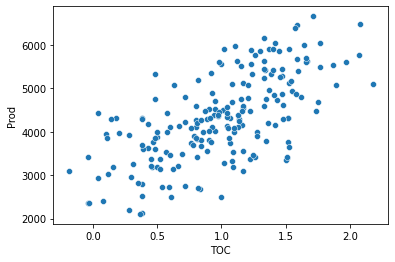

In [49]:
sns.scatterplot(x='TOC', y='Prod', data=data);

In [50]:
np.linalg.lstsq(A, y, rcond=None)

(array([[-1.23230803e+03],
        [ 5.07003631e-02],
        [ 2.30179140e+02],
        [ 1.16239006e+02],
        [-3.65202301e+02],
        [ 2.49943700e+01],
        [-7.84009294e+01],
        [ 7.85259815e+02]]),
 array([7863008.02805328]),
 8,
 array([1.75726792e+03, 3.87998844e+02, 7.41712919e+01, 1.61441542e+01,
        1.13261139e+01, 5.07204769e+00, 1.60361699e+00, 9.73609868e-01]))

In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
## w_hat: [ 6.   -1.25  1.25]

w_hat: [[-1.23230803e+03  5.07003631e-02  2.30179140e+02  1.16239006e+02
  -3.65202301e+02  2.49943700e+01 -7.84009294e+01  7.85259815e+02]]


**Задание 5.5**

Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения, выше \($0.7$\). Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с объёмом добычи газа.

Также исключите из данных факторы, для которых корреляция с целевой переменной меньше \($0.05$\).

In [52]:
# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline

df = pd.DataFrame(A_st, columns=['Well', 'Por', 'Perm','AI','Brittle','TOC','VR', 'Prod'])
A_corr = df.corr()
fig = px.imshow(A_corr, width=600, height=600)
fig.show()

1. Какие факторы вы будете исключать?

**Ответ**
Верно:  
A Верно.  Well     
C Верно.  Perm  
F Верно.  TOC  

2. Постройте линейную регрессию на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу NumPy.

В качестве ответа укажите полученные оценки коэффициентов модели. Ответ округлите до целого числа.

In [53]:
from sklearn.metrics import mean_absolute_percentage_error
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values
index = ['intercept']+list(X.columns)
n = X.shape[0]
X = np.column_stack((np.ones(n), X))
w_hat = np.linalg.inv(X.T@X)@X.T@y
y_pred = X @ w_hat
print(pd.Series(np.round(w_hat, 0), index=index))
print(f'MAPE: {mean_absolute_percentage_error(y, y_pred)*100:.1f} %')

intercept   -1835.0
Por           293.0
AI           -200.0
Brittle        28.0
VR            517.0
dtype: float64
MAPE: 4.0 %


In [54]:
np.linalg.lstsq(X, y, rcond=None)

(array([-1835.44646069,   293.03624565,  -200.03091206,    27.64098209,
          517.40272597]),
 array([10732170.91584706]),
 5,
 array([739.64279965,  77.09118009,  11.80071094,   2.84278073,
          1.2720029 ]))

_________________________________________________

### 6. Полиномиальная регрессия

✍ Когда мы знакомились с моделью линейной регрессии в модуле по машинному обучению, мы также кратко затронули и её модификации. Теперь настало время вновь обратиться к ним и посмотреть на них с математической точки зрения.

Начнём с **модели полиномиальной регрессии**.

**Полином (многочлен)** от $k$ переменных $x_1, \ x_2, \ ..., \ x_k$ — это выражение (функция) вида:

$P\left(x_{1}, x_{2}, \ldots, x_{k}\right)=\sum_{I} w_{i} x_{1}^{i_{1}} x_{2}{ }^{i_{2}} \ldots x_{k}^{i_{k}}$,
где

$I$=(i_1, i_2, \ ...., \ i_k)$ — набор из $k$ целых неотрицательных чисел — степеней полинома;
 $w_I$ — числа, называемые **коэффициентами полинома**.
Пока эта форма записи нам ничего не даёт — она слишком сложная. Давайте рассмотрим пример попроще. Когда переменная всего одна, полином будет записываться как:

$P(x) = \sum_{I} w_i x^i = w_0 + w_1 x^1 + w_2 x^2 + ... + w_k x^k$
Выражение для полинома первой степени уже можно прочитать без особого труда. Видно, что на самом деле полином — это линейная комбинация из различных степеней переменной $x$, взятой с какими-то коэффициентами, причём некоторые из коэффициентов могут быть нулевыми.

Максимальная степень при переменной $x$ называется **степенью полинома**.

Самый простой пример полинома от одной переменной — парабола. Это полином второй степени. Вспомним её уравнение:

$y = ax^2 + bx + c$,
где $x$ — это некоторая неизвестная, а коэффициенты $a, b$ и $c$ определяют различные параметры этой параболы (направление её ветвей, начало параболы, её растяжение и т. д.).

Ниже представлены возможные варианты расположения параболы в зависимости от коэффициентов $a, b$ и $c$.

<img src="data\MATHML_md2_6_1.png" alt="drawing" width="650"/>

Вспомним, что уравнение $y = ax^2 + bx + c = 0$ определяет точки пересечения параболы с осью абсцисс — осью $X$. Чтобы найти точки пересечения, необходимо решить это квадратное уравнение. Вы наверняка делали это в школе: найти дискриминант, затем квадратные корни и т. д. Сейчас мы не будем этим заниматься, но понимание сути процедуры полезно для общего осознания принципа работы полиномиальной регрессии.

Несколько простых примеров различных полиномов с числовыми коэффициентами для наглядности:

$y=8+5x+2x^2$ — парабола

$y=5x+x^3$ — кубическая парабола

$y=8x^5+3x^4+x^3+x^2+5x$ — полином пятой степени

Кстати, отметим важный факт: уравнение прямой также является частным случае полинома первой степени:

$y=w_0+w_1 x$

? Чем нам так интересны полиномы (особенно степени > 1)?

На самом деле всё очень просто: полином степени $k$ способен описать абсолютно любую зависимость. Для этого ему достаточно задать набор наблюдений — точек, через которые он должен пройти (или пройти приблизительно). Вопрос стоит только в степени этого полинома — $k$. Например, ниже представлено три полинома: первой степени — линейная регрессия, второй степени — квадратичная регрессия и третьей степени — кубическая регрессия.

<img src="data\MATHML_md2_6_2.png" alt="drawing" width="550"/>

Видно, что для полинома первой степени (линейной регрессии) представленная в данных нелинейная зависимость целевой переменной $y$ от фактора $x$, даётся тяжело: ошибка прогноза довольно велика. Два других полинома хорошо описывают поведение точек в пространстве.

**Цель обучения** модели полиномиальной регрессии степени та же, что и для линейной регрессии: найти такие коэффициенты $w_i$, при которых ошибка между построенной функцией и обучающей выборкой была бы наименьшей из возможных.

На самом деле для поиска этих коэффициентов мы можем использовать те же самые методы, что и для линейной регрессии, а именно **метод наименьших квадратов**. Мы можем взять уравнение полинома и потребовать, чтобы кривая проходила через точки в обучающей выборке (на графике выше они обозначены синим). Значения точек можно обозначить за $y_1, \ y_2, \ ..., \ y_N$. Тогда мы хотим, чтобы для полинома степени $k$ (от одной переменной) выполнялась система уравнений:

<img src="data\MATHML_md2_6_3.png" alt="drawing" width="350"/>

Обычно количество точек в обучающей выборке $N$значительно больше, чем степень полинома $k$, а значит перед нами переопределённая СЛАУ относительно с $k+1$ неизвестной — $w_i$. Точных решений у системы практически никогда не будет, но мы умеем решать её приближённо. Мы даже вывели формулу для приближённого решения:

$\vec{w}=\left(A^{T} A\right)^{-1} A^{T} \vec{y}$
→ Итак, мы вкратце обсудили, как должно выглядеть решение для полинома от одной переменной (от одного фактора). Теперь давайте более подробно остановимся на нюансах решения этой задачи и плавно перейдём к полиномам от нескольких переменных.

Начнём с **квадратичной регрессии от одной переменной**.

Пусть у нас некоторый вектор-фактор $\vec{x}=(x_1, x_2, ..., x_N)^T$, от которого зависит целевая переменная $\vec{y}=(y_1, y_2, ..., y_N)^T$. Будем предполагать, что зависимость нелинейная — допустим, квадратичная, то есть в качестве модели используется уравнение параболы. Тогда мы хотим выразить вектор $\vec{y}$ как линейную комбинацию из векторов $\vec{x}$ и $\vec{x}^2$:

$\vec{y}=w_0 +w_1 \vec{x}+w_2 \vec{x}^2$

или

<img src="data\MATHML_md2_6_4.png" alt="drawing" width="350"/>


**Важное лирическое отступление ↓**

У внимательного студента должен был возникнуть вопрос: а что значит возвести вектор в квадрат? На первый взгляд, может показаться, что мы ищем скалярное произведение вектора с самим собой, ведь:

$\vec{x}^2=\vec{x} \cdot \vec{x}=(\vec{x} \cdot \vec{x})$
Однако такой вариант нам не подходит, так как скалярное произведение — это число, а нам нужен именно вектор, иначе у нас не получится составить линейную комбинацию. Поэтому здесь под $\vec{x}^2$ понимается вектор из квадратов координат вектора $\vec{x}$. Тогда:

<img src="data\MATHML_md2_6_5.png" alt="drawing" width="200"/>

**Ещё одно важное замечание**: обратите внимание, что, несмотря на то что в нашем уравнении появились квадраты, оно всё равно продолжает быть линейным, так как неизвестным является не вектор $\vec{x}$, а коэффициенты разложения $w_0, w_1$ и $w_2$. 

Итак, у нас получилась СЛАУ, состоящая из N уравнений на трёх неизвестных:

<img src="data\MATHML_md2_6_6.png" alt="drawing" width="300"/>

Давайте для удобства и привычной нумерации переменных обозначим вектор $\vec{z}_1=\vec{x}$, а $\vec{z}_2=\vec{x}^2$. Тогда:

<img src="data\MATHML_md2_6_7.png" alt="drawing" width="500"/>

Тогда получим уже знакомую нам неоднородную переопределённую СЛАУ:

<img src="data\MATHML_md2_6_8.png" alt="drawing" width="300"/>

Или в матричном виде:

<img src="data\MATHML_md2_6_9.png" alt="drawing" width="300"/>

Что мы делаем с такими СЛАУ? Верно — решаем. Правда, только приближённо. Раз система линейная и переопределённая, то МНК — наш лучший выбор. Тогда решение такой системы будет полностью аналогичным формуле для поиска коэффициентов простой линейной регрессии, разве что коэффициентов будет немного побольше:

$\vec{w}=\left(A^{T} A\right)^{-1} A^{T} \vec{y}$

**? Пример № 1**

Построить квадратичную регрессию на целевую переменную $\vec{y}$ из одного фактора $\vec{x}$, если:

<img src="data\MATHML_md2_6_10.png" alt="drawing" width="250"/>

Итак, вот наша полиномиальная модель второй степени (квадратичная регрессионная модель):

$\vec{y}=w_0 +w_1 \vec{x}+w_2 \vec{x}^2$

<img src="data\MATHML_md2_6_11.png" alt="drawing" width="400"/>

Нам нужно найти такую линейную комбинацию из векторов $\vec{1}, \vec{x}$ и $\vec{x}^2$, которая в сумме давала бы наилучшее приближение для $y$. Записываем систему в матричном виде:

<img src="data\MATHML_md2_6_12.png" alt="drawing" width="600"/>

Посчитаем ранг матрицы системы и ранг расширенной матрицы системы на случай, если система определённая и имеет конкретное решение или вовсе имеет бесконечное количество решений:

<img src="data\MATHML_md2_6_13.png" alt="drawing" width="750"/>

Видно, что ранг матрицы системы $(rk(A)=3)$ всё-таки меньше, чем ранг расширенной матрицы $(rk(A|\vec{y})=4)$, а значит система не имеет конкретных решений — только приближённые. Найдём их:

$\vec{w}=\left(A^{T} A\right)^{-1} A^{T} \vec{y}$

Для оптимизации процесса считать будем на Python:

In [55]:
A = np.array([
    [1, 1, 1, 1],
    [1, 3, -2, 1],
    [1, 9, 4, 1]
]).T
y = np.array([4, 5, 2, 2])
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat) 
# [2.4        0.46666667 0.13333333]

[2.4        0.46666667 0.13333333]


Таким образом, наш вектор оценок коэффициентов:

$\hat{\vec{w}} = (\hat{w}_0, \hat{w}_1, \hat{w}_2)^T = (2.4, 0.47, 0.13)^T$
Чтобы сделать прогноз для нового наблюдения x_{new}, нам нужно поставить его в уравнение полинома с найденными коэффициентами:

$\vec{y}=2.4 +0.47 x_{new} + 0.13 x^{2}_{new}$
Как вы понимаете, один фактор — это слишком тривиальная, далёкая от реальности ситуация. Давайте посмотрим, как выглядит уравнение квадратичной регрессии для случая двух переменных.

Пусть у нас есть два фактора $\vec{x}_1$ и $\vec{x}_2$, от которых зависит целевая переменная $\vec{y}$:

<img src="data\MATHML_md2_6_14.png" alt="drawing" width="450"/>

Всё то же самое: будем предполагать, что зависимость нелинейная, а точнее, квадратичная, то есть в качестве модели используется полином второй степени, задающий сложную трёхмерную поверхность, форма которой напрямую зависит от коэффициентов. Заметим, что в функцию уже будут включены попарные произведения факторов $\vec{x}_1$ и $\vec{x}_2$, а коэффициентов будет уже шесть:

$\vec{y}=w_{0}+w_{1} \vec{x}_{1}+w_{2} \vec{x}_{2}+w_{3} \vec{x}_{1}^{2}+w_{4} \vec{x}_{1} \vec{x}_{2}+w_{5} \vec{x}_{2}^{2}$

**Примечание**. Здесь, как и в предыдущем случае, запись $\vec{x}_1 \vec{x}_2$ означает покоординатное (не скалярное!) произведение векторов $\vec{x}_1$ и $\vec{x}_2$.

или

<img src="data\MATHML_md2_6_15.png" alt="drawing" width="750"/>

В матричном виде:

<img src="data\MATHML_md2_6_16.png" alt="drawing" width="450"/>

Выглядит громоздко, но на деле ничего серьёзного. Если воспринимать все полиномиальные столбцы как обычные столбцы, состоящие из чисел, мы просто снова получим обычную переопределённую неоднородную СЛАУ (если N значительно больше количества признаков k):

<img src="data\MATHML_md2_6_17.png" alt="drawing" width="450"/>

→ Сразу обратим внимание на то, что для того, чтобы система имела точное (была совместной) или хотя бы приближённое решение, нам необходимо, чтобы строк в матрице было как минимум шесть, причём все уравнения должны быть линейно независимыми. Иначе количество строк будет меньше количества столбцов, и тогда решений будет бесконечное множество (по первому следствию теоремы Кронекера — Капелли), а такой случай нам не подходит.

**Что это значит на языке геометрии?**

Это значит, что нам нужно как минимум шесть точек в трёхмерном пространстве с осями $\vec{x}_1, \vec{x}_2$ и $\vec{y}$, чтобы мы смогли провести через них нашу поверхность, которую задаёт уравнение:

$\vec{y}=w_{0}+w_{1} x_{1}+w_{2} x_{2}+w_{3} x_{1}^{2}+w_{4} x_{1} x_{2}+w_{5} x_{2}^{2}$

**? Пример № 2**

Построить квадратичную регрессию на целевую переменную $\vec{y}$ из двух факторов $\vec{x}_1$ и $\vec{x}_2$, если:

<img src="data\MATHML_md2_6_18.png" alt="drawing" width="400"/>

Записываем нашу модель:

<img src="data\MATHML_md2_6_19.png" alt="drawing" width="700"/>

Записываем систему в матричном виде:

<img src="data\MATHML_md2_6_20.png" alt="drawing" width="750"/>

Видно, что первое и последнее уравнение системы противоречат друг другу. Можно не считать ранг —сразу понятно, что система будет переопределённой и нужно искать приблизительные решения по МНК:

$\vec{w}=\left(A^{T} A\right)^{-1} A^{T} \vec{y}$

Чтобы решить такую задачу, без Python и матричных вычислений точно не обойтись. Переведём наши условия в программную реализацию. С точки зрения программы самое сложное в этой задаче — правильно записать матрицу A:

In [56]:
A = np.array([
    [1, 1, 1, 1, 1, 1, 1],
    [1, 3, -2, 1, 5, 13, 1],
    [3, 4, 5, -2, 4, 11, 3],
    [1, 9, 4, 1, 25, 169, 1],
    [3, 12, -10, -2, 20, 143, 3],
    [9, 16, 25, 4, 16, 121, 9]
    
]).T
y = np.array([4, 5, 2, 2, 6, 8, -1])
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat)
## [-2.25799015  2.37672337 -0.1322068  -0.10208147 -0.26501791  0.29722471]

[-2.25799015  2.37672337 -0.1322068  -0.10208147 -0.26501791  0.29722471]


Как вы понимаете, вручную считать коэффициенты полиномиальной регрессии — неблагодарное дело. А ведь мы с вами рассмотрели только случай полинома второй степени с двумя факторами. Расти может как степень полинома, так и количество факторов. Можно представить, какую размерность может приобрести система уравнений.

Например, уравнение модели полинома третьей степени для случая двух факторов будет иметь следующий вид:

$\vec{y}=w_{0}+w_{1} \vec{x}_{1}+w_{2} \vec{x}_{2}+w_{3} \vec{x}_{1}^{2}+w_{4} \vec{x}_{1} \vec{x}_{2}+w_{5} \vec{x}_{2}^{2}+w_{6} \vec{x}_{1}^{3}+w_{7} \vec{x}_{1}^{2} \vec{x}_{2}+w_{8} \vec{x}_{2}^{3}+w_{9} \vec{x}_{1} \vec{x}_{2}^{2}$
Количество неизвестных уже равно 10, а факторов пока ещё два. Как говорится, то ли ещё будет...

**Примечание**. Кстати, для того чтобы определить количество коэффициентов в регрессии, есть формула:

$c = \frac{n!}{(n-d)!d!}$,
$n = k + d$,
где $k$ — количество факторов, $d$ — степень полинома, а $!$ — символ факториала. Например, для двух факторов и пятой степени полинома будем иметь:

$n=2+5=7$  
$c = \frac{n!}{(n-d)!d!} = \frac{7!}{(7-5)!5!} = \frac{7!}{2!5!} = \frac{1 \cdot 2 \cdot 3 \cdot 4 \cdot 5 \cdot 6 \cdot 7}{(1 \cdot 2) \cdot (1 \cdot 2 \cdot 3 \cdot 4 \cdot 5)} = \frac{42}{2} = 21$  
То есть в матрице измерений A будет 21 столбец.

Конечно, вручную создавать полиномиальные столбцы в матрице наблюдений мы не будем. В модуле «ML-2. Обучение с учителем: регрессия» мы с вами уже знакомились с полиномиальными признаками, генерация которых реализована в классе PolynomialFeatures из модуля preprocessing. 

Потренируемся на следующем **примере** ↓

**? Пример № 3**

Строится полиномиальная регрессия второй степени, задано три фактора:

$\vec{x}_{1}=\left(\begin{array}{c} 1 \\ 3 \\ -2 \\ 1 \\ 5 \\ 13 \\ 1 \end{array}\right) \vec{x}_{2}=\left(\begin{array}{c} 3 \\ 4 \\ 5 \\ -2 \\ 4 \\ 11 \\ 3 \end{array}\right) \text { и } \vec{x}_{3}=\left(\begin{array}{c} 4 \\ 5 \\ 2 \\ 2 \\ 6 \\ 8 \\ -1 \end{array}\right)$
Создайте матрицу наблюдений $A_{poly}$ со сгенерированными полиномиальными признаками.

Для начала составим обычную матрицу наблюдений $A$, расположив векторы в столбцах. Обратите внимание, что вектор из 1 мы не будем добавлять в матрицу (за нас это сделает генератор полиномиальных признаков):

In [57]:
A = np.array([
    [1, 3, -2, 1, 5, 13, 1],
    [3, 4, 5, -2, 4, 11, 3],
    [4, 5, 2, 2, 6, 8, -1],
]).T
print(A)

[[ 1  3  4]
 [ 3  4  5]
 [-2  5  2]
 [ 1 -2  2]
 [ 5  4  6]
 [13 11  8]
 [ 1  3 -1]]


Затем импортируем класс PolynomialFeatures из библиотеки sklearn. Создадим объект этого класса, указав при инициализации степень полинома равной 2. Также укажем, что нам нужна генерация столбца из 1 (параметр include_bias=True):

In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)

Осталось только вызвать метод fit_transform() от имени этого объекта и передать в него нашу матрицу наблюдений A. Для удобства выведем результат в виде DataFrame:

In [59]:
A_poly = poly.fit_transform(A)
display(pd.DataFrame(A_poly))

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,9.0,12.0,16.0
1,1.0,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,1.0,-2.0,5.0,2.0,4.0,-10.0,-4.0,25.0,10.0,4.0
3,1.0,1.0,-2.0,2.0,1.0,-2.0,2.0,4.0,-4.0,4.0
4,1.0,5.0,4.0,6.0,25.0,20.0,30.0,16.0,24.0,36.0
5,1.0,13.0,11.0,8.0,169.0,143.0,104.0,121.0,88.0,64.0
6,1.0,1.0,3.0,-1.0,1.0,3.0,-1.0,9.0,-3.0,1.0


Итак, мы получили нашу матрицу A_{poly}. Давайте посмотрим на её столбцы:

- столбец 0 — единичный, он отвечает за слагаемое с нулевой степенью полинома (любое число в степени 0 даёт единицу).
- столбцы 1, 2 и 3 — это наши исходные признаки (векторы $\vec{x}_1$, $\vec{x}_2$ и $\vec{x}_3$).
- столбцы 4, 5 и 6 — произведения первого столбца со всеми столбцами: $\vec{x}_1 \vec{x}_1=\vec{x}_{1}^{2}$, $\vec{x}_1 \vec{x}_2$ и $\vec{x}_1 \vec{x}_3$ соответственно.
- столбцы 7 и 8 — произведения второго столбца со столбцами 2 и 3:  $\vec{x}_2 \vec{x}_2=\vec{x}_{2}^{2}$ и $\vec{x}_2 \vec{x}_3$.
- столбец 9 — произведение третьего столбца с самим собой: $\vec{x}_3 \vec{x}_3=\vec{x}_{3}^{2}$.
Таким образом, при генерации полиномиальных признаков объект PolynomialFeatures сначала создаёт исходные факторы, затем умножает каждый из них на все факторы и повторяет процедуру. При этом, если комбинация $\vec{x}_i \vec{x}_j$ уже была сгенерирована ранее, то комбинация $\vec{x}_j \vec{x}_i$ не рассматривается.

А теперь построим модель полиномиальной регрессии на **реальных данных**.

Возьмём все те же данные о стоимости жилья в районах Бостона. Будем использовать следующие четыре признака: LSTAT, CRIM, PTRATIO и RM. С их помощью мы построим полиномиальную регрессию от первой до пятой степени включительно, а затем сравним результаты по значению средней абсолютной процентной ошибки (MAPE).

Чтобы не дублировать код, объявим функцию polynomial_regression(). Она будет принимать на вход матрицу наблюдений, вектор ответов и степень полинома, а возвращать матрицу с полиномиальными признаками, вектор предсказаний и коэффициенты регрессии, найденные по МНК:

In [60]:
def polynomial_regression(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=True)
    X_poly = poly.fit_transform(X)
    w_hat = np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y
    y_pred = X_poly @ w_hat
    return X_poly, y_pred, w_hat

Выделяем интересующие нас признаки и строим полиномы:

In [61]:
A = boston_data[['LSTAT', 'PTRATIO', 'RM', 'CRIM']]
y = boston_data[['PRICE']]
 
A_poly, y_pred, w_hat = polynomial_regression(A, y, 1)
A_poly2, y_pred2, w_hat2 = polynomial_regression(A, y, 2)
A_poly3, y_pred3, w_hat3 = polynomial_regression(A, y, 3)
A_poly4, y_pred4, w_hat4 = polynomial_regression(A, y, 4)
A_poly5, y_pred5, w_hat5 = polynomial_regression(A, y, 5)

Посмотрим на качество построенных регрессий, вычислив метрику:

In [62]:
from sklearn.metrics import mean_absolute_percentage_error
 
print('MAPE для полинома 1-й степени {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred)*100))
print('MAPE для полинома 2-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred2)*100))
print('MAPE для полинома 3-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred3)*100))
print('MAPE для полинома 4-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred4)*100))
print('MAPE для полинома 5-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred5)*100))
## MAPE для полинома 1-й степени 18.20%
## MAPE для полинома 2-й степени  13.41%
## MAPE для полинома 3-й степени  12.93%
## MAPE для полинома 4-й степени  10.74%
## MAPE для полинома 5-й степени  5328.16%

MAPE для полинома 1-й степени 18.20%
MAPE для полинома 2-й степени  13.41%
MAPE для полинома 3-й степени  12.93%
MAPE для полинома 4-й степени  10.72%
MAPE для полинома 5-й степени  470.54%


Что видим? Полиномиальная регрессия первой степени (линейная регрессия) показывает наименьшее качество предсказания, так как зависимость между факторами и целевым признаком нелинейная. С повышением степени полинома процентная ошибка на обучающей выборке вроде бы падает, однако для полинома пятой степени она резко возрастает и начинает измеряться тысячами процентов. Это означает, что модель вообще не описывает зависимость в исходных данных — её прогноз не имеет никакого отношения к действительности.

**Почему так происходит?**

Проведём небольшое исследование. Для начала посмотрим на коэффициенты регрессии для полинома пятой степени. Смотреть на каждый из них неудобно, их слишком много (126, если быть точными), но можно взглянуть на минимум, максимум и среднее:

In [63]:
display(pd.DataFrame(w_hat5).describe())

,PRICE
count,126.000000
mean,1827.374637
std,45541.271004
min,-213771.933237
25%,-0.661564
50%,0.000009
75%,2.606294
max,457926.187798


Видно, что в степенях минимального и максимального коэффициентов явно что-то не так — коэффициенты слишком огромные (исчисляются миллионами).

Теперь давайте взглянем на корреляционную матрицу для факторов, на которых мы строим полином пятой степени. Корреляцию со столбцом из единиц считать бессмысленно, поэтому мы не будем его рассматривать. Для удобства расчёта матрицы корреляций обернём матрицу  в DataFrame и воспользуемся методом corr():

In [64]:
# считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(A_poly5[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))
# считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly5[:, 1:].shape[1])
# Ранг корреляционной матрицы: 110
# Количество факторов: 125

Ранг корреляционной матрицы: 110
Количество факторов: 125


Мы нашли корень проблемы: ранг корреляционной матрицы — 110, в то время как общее количество факторов (не считая единичного столбца) — 125, то есть ранг корреляционной матрицы не максимален. Это значит, что в корреляционной матрице присутствуют единичные корреляции, а в исходной матрице — линейно зависимые столбцы.

Как так вышло? На самом деле всё очень просто: в процессе перемножения каких-то из столбцов при создании полинома пятой степени получился такой полиномиальный фактор, который линейно выражается через другие факторы.

В результате при вычислении обратной матрицы  у нас получилось деление на число, близкое к 0, а элементы обратной матрицы получились просто огромными. Отсюда и появились явно неверные степени коэффициентов, которые дают далёкий от действительности прогноз, что приводит к отрицательной метрике.

Кстати, заметим, что, например, для полинома четвёртой степени ранг матрицы корреляций максимален, то есть равен количеству факторов (не включая единичный столбец):

In [65]:
# считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(A_poly4[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))
# считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly4[:, 1:].shape[1])
## Ранг корреляционной матрицы: 69
## Количество факторов: 69

Ранг корреляционной матрицы: 69
Количество факторов: 69


Поэтому и коэффициенты регрессии полинома четвёртой степени находятся в адекватных пределах.

In [66]:
display(pd.DataFrame(w_hat4).describe())

,PRICE
count,70.000000
mean,-50.817470
std,886.646328
min,-6919.292921
25%,-0.187941
50%,-0.000796
75%,0.322218
max,2304.985151


А теперь посмотрим, что будет, если использовать для построения полиномиальной регрессии **реализацию из библиотеки sklearn**. Создадим функцию polynomial_regression_sk — она будет делать то же самое, что и прошлая функция, но средствами sklearn. Дополнительно будем смотреть также стандартное отклонение (разброс) по коэффициентам регрессии.

In [67]:
def polynomial_regression_sk(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=False)
    X_poly = poly.fit_transform(X)
    lr = LinearRegression().fit(X_poly, y)
    y_pred = lr.predict(X_poly)
    return X_poly, y_pred, lr.coef_

A = boston_data[['LSTAT', 'PTRATIO', 'RM', 'CRIM']]
y = boston_data[['PRICE']]

for k in range(1, 6):
    A_poly, y_pred, w_hat = polynomial_regression_sk(A, y, k)
    print(
        "MAPE для полинома степени {} — {:.2f}%, СКО — {:.0f}".format(
            k, mean_absolute_percentage_error(y, y_pred)*100, w_hat.std()
        )

    )
## MAPE для полинома степени 1 — 18.20%, СКО — 2
## MAPE для полинома степени 2 — 13.41%, СКО — 5
## MAPE для полинома степени 3 — 12.93%, СКО — 9
## MAPE для полинома степени 4 — 10.74%, СКО — 304
## MAPE для полинома степени 5 — 9.02%, СКО — 17055

MAPE для полинома степени 1 — 18.20%, СКО — 2
MAPE для полинома степени 2 — 13.41%, СКО — 5
MAPE для полинома степени 3 — 12.93%, СКО — 9
MAPE для полинома степени 4 — 10.74%, СКО — 304
MAPE для полинома степени 5 — 9.02%, СКО — 17055


Очередная «магия» sklearn — построение полинома пятой степени прошло успешно.

? Почему так получилось, если, строя полином «руками», мы получали противоположный результат?

На самом деле с этим «заклинанием» из библиотеки sklearn мы уже знакомились в предыдущих юнитах. Секрет в том, что в sklearn для построения линейной регрессии используется не сама матрица наблюдений \($A$\), а её сингулярное разложение, которое гарантированно является невырожденным — из него исключаются линейно зависимые факторы. Таким образом, даже несмотря на немаксимальный ранг корреляционной матрицы, построить полином пятой степени всегда получится.

Однако коэффициенты полинома пятой степени обладают значительно бόльшим разбросом, чем другие модели. Разброс будет всё больше расти при увеличении степени полинома. Коэффициенты не будут отражать реальной зависимости в данных и будут построены так, чтобы компенсировать линейную зависимость факторов, то есть будут неустойчивыми.

К тому же, как мы уже знаем, чем выше степень полинома, тем выше шанс переобучения: модель может быть настолько сложной, что попросту попытается пройти через все точки в обучающем наборе данных, не уловив общей закономерности. Пример такой переобученной модели представлен ниже:

<img src="data\MATHML_md2_6_24.png" alt="drawing" width="450"/>

**Резюмируем ↓**

- Модель полиномиальной регрессии — более общий случай линейной регрессии, в котором зависимость целевой переменной от факторов нелинейная.
- Поиск коэффициентов полинома аналогичен линейной регрессии — решение неоднородной СЛАУ. 
- Возможна ситуация, когда какие-то сгенерированные полиномиальные факторы могут линейно выражаться через другие факторы. Тогда ранг корреляционной матрицы будет меньше числа факторов и поиск по классическому МНК-алгоритму не будет успешным.
- В sklearn для решения последней проблемы предусмотрена защита — использование сингулярного разложения матрицы \(A\). Однако данная защита не решает проблемы неустойчивости коэффициентов регрессии.
- Полиномиальная регрессия имеет сильную склонность к переобучению: чем выше степень полинома, тем сложнее модель и выше риск переобучения.

**Задание 6.1**

Построена модель полиномиальной регрессии следующего вида:

\[$y=10.4+8 \cdot x_1+0.5 \cdot x_2+3 \cdot x_{1}^{2}+0.4 \cdot x_{2}^{2}+0 \cdot x_1 x_2$\]

Поступило новое наблюдение, которое характеризуется вектором \($x_{new}=(x_{1new}, x_{2new})^T=(1, 4)^T$\).

Сделайте прогноз целевой переменной с помощью полученной полиномиальной регрессии. Ответ округлите до первого знака после точки-разделителя

In [68]:
y=10.4+8*1+0.5*4+3*1+0.4*4**2
round(y, 1)

29.8

**Задание 6.2**

Строится полиномиальная регрессия второй степени от одного фактора \($x$\). Как будет выглядеть матрица наблюдений \($A$\), если:

<img src="data\MATHML_md2_6_25.png" alt="drawing" width="150"/>

В качестве ответа введите элементы полученной матрицы \($A$\).

Модель полиномиальной регрессии от одного фактора:
\[$\overrightarrow{y}=w_0\ +w_1\overrightarrow{x}+w_2{\overrightarrow{x}}^2$\]  
Откуда матрица наблюдений \($A$\) будет иметь вид:

In [69]:
A = np.array([
    [1, 1, 1],
    [1, 3, 9],
    [1, -2, 4],
    [1, 9, 81],
])
print(A)

[[ 1  1  1]
 [ 1  3  9]
 [ 1 -2  4]
 [ 1  9 81]]


**Задание 6.3**

Какую размерность будет иметь матрица измерений \(A\), если в наборе данных пять факторов, а в качестве модели используется полином второй степени?

Воспользуемся формулой:
\[$c=\frac{n!}{\left(n-d\right)!d!},$\]  
\[$n=k+d,$\]  
где \($k$\) — количество факторов, \($d$\) — степень полинома, а \($!$\) — символ факториала.  
Тогда:
\[$n=5+2=7$\]  
\[$c=\frac{5!}{\left(7-2\right)!2!}=\frac{7!}{5!2!}=\frac{5040}{240}=21$\]  

**Задание 6.4**

С помощью классического МНК найдите коэффициенты полиномиальной регрессии, если используется полином второй степени и задан фактор \($\vec{x}$\) и целевая переменная \($\vec{y}$\).

\[$\vec{y} = w_0 + w_1 \vec{x} + w_2 \vec{x}^2$\]

\[$\vec{x}=\left(\begin{array}{c} 1 \\ 3 \\ -2 \\ 9 \end{array}\right) \vec{y}=\left(\begin{array}{c} 3 \\ 7 \\ -5 \\ 21 \end{array}\right)$\]

В качестве ответа приведите координаты вектора коэффициентов \($\hat{w}_0$\), \($\hat{w}_1$\), \($\hat{w}_2$\), округлив их до первого знака после точки-разделителя.

Исходная модель имеет вид:
\[$\overrightarrow{y}=w_0\ +w_1\overrightarrow{x}+w_2{\overrightarrow{x}}^2$\]
Тогда матрица наблюдений \($A$\) будет следующей:

<img src="data\pic-2.png" alt="drawing" width="350"/>

Оценки коэффициентов регрессионной модели находим по методу наименьших квадратов:
\[$\widehat{\overrightarrow{w}}={\left(A^TA\right)}^{-1}A^T\overrightarrow{y}$\]

In [70]:
A = np.array([
[1, 1, 1, 1],
[1, 3, -2, 9],
[1, 9, 4, 81]
]).T
y = np.array([3, 7, -5, 21])
print(np.round(np.linalg.inv(A.T@A)@A.T@y, 1))
## [ 0.1 2.5 -0. ]

[ 0.1  2.5 -0. ]


__________________________________________________________________

### 7. Регуляризация

✍ В предыдущем юните мы говорили о том, что полиномиальная регрессия склонна к переобучению. Это связано со сложностью модели и её способностью подстраиваться под очень сложные зависимости, из-за которых возникает высокий разброс.

Рассмотрим **пример** ↓

Обучим модель полиномиальной регрессии третьей степени. Будем использовать данные о жилье в Бостоне и возьмём следующие четыре признака: LSTAT, CRIM, PTRATIO и RM.

Для оценки качества модели будем использовать кросс-валидацию и сравнивать среднее значение метрики на тренировочных и валидационных фолдах. Кросс-валидацию организуем с помощью функции cross_validate из модуля model_selection:

In [71]:
from sklearn.model_selection import cross_validate

В качестве метрики используем среднюю абсолютную процентную ошибку — MAPE.

In [72]:
# выделяем интересующие нас факторы
X = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]
 
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
 
# создаём модель линейной регрессии
lr = LinearRegression()
 
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(lr, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))	
 
## MAPE на тренировочных фолдах: 12.64 %
## MAPE на валидационных фолдах: 24.16 %

MAPE на тренировочных фолдах: 12.64 %
MAPE на валидационных фолдах: 24.16 %


Что мы видим? Даже при, казалось бы, небольшой, третьей степени полинома мы получили переобучение: на тренировочной выборке \($MAPE=12.64 \%$\), а вот на тестовой — \($MAPE=24.16 \%$\). Показатели качества отличаются практически в два раза, что говорит о высоком разбросе модели. Ещё более удручающий результат мы получим, если воспользуемся полиномом большей степени (при желании вы можете проверить это самостоятельно).

Как с этим справиться, мы тоже уже знаем.

- Можно попробовать понизить сложность модели (снизить степень полинома). Но до какой степени? Можно постепенно перебирать степень полинома до тех пор, пока не получим адекватные результаты, но, согласитесь, процедура не очень приятная.
- Можно воспользоваться методами регуляризации.
О втором способе как раз и поговорим подробнее с математической точки зрения.

Для начала вспомним, что такое **регуляризация**.

**Регуляризация** — это способ уменьшения переобучения моделей машинного обучения путём намеренного увеличения смещения модели для уменьшения её разброса.

Регуляризация для линейной регрессии преследует сразу несколько целей. Однако далее мы увидим, что все эти цели на самом деле взаимосвязаны:

- предотвратить переобучение модели;
- включить в функцию потерь штраф за переобучение;
- обеспечить существование обратной матрицы \($(A^T A)^{-1}$\);
- не допустить огромных коэффициентов модели.
→ Мы знаем, что большие значения весов — прямое свидетельство переобучения модели линейной регрессии и её нестабильности. Идея регуляризации состоит в наложении ограничения на вектор весов (часто говорят — наложение штрафа за высокие веса). В качестве штрафа принято использовать **норму вектора весов**.

Давайте запишем это на языке линейной алгебры. Вот задача минимизации длины вектора ошибок, о которой мы говорили, когда выводили формулу МНК:

\[$\left\|\vec{y} - A\vec{w} \right\|^2 \rightarrow min,$\]

где \($\vec{y}$\) — вектор истинных ответов, \($A$\) — матрица наблюдений, \($\vec{w}$\) — вектор весов линейной регрессии \($\vec{w}=(w_0, w_1, w_2, …, w_k)^T$\).

Вот её приближённое решение по МНК:

\[$\vec{w}=\left(A^{T} A\right)^{-1} A^{T} \vec{y}$\]

Теперь в исходную задачу оптимизации добавим ограничение на норму вектора весов — она не должна превышать некоторого заранее заданного \($b$\):



<img src="data\MATHML_md2_7_1.png" alt="drawing" width="250"/>

где $\left\|\vec{w} \right\|_{L_{p}}$ — норма вектора порядка $p>1$, которая определяется как:

$\|\vec{w}\|_{L_{p}}=\sqrt[p]{\sum_{i=0}^{k}\left|w_{i}\right|^{p}}$  
**Примечание**. Обратите внимание на сумму под знаком корня. У нас она начинается с $i=0$. Однако иногда в литературе, например здесь, можно встретить $i=1$, то есть свободный член $w_0$ рекомендуется не регуляризировать (не ограничивать). На самом деле это утверждение эвристическое и может как выполняться, так и нет, в зависимости от особенностей реализации. Мы будем придерживаться реализации в sklearn, в которой  $w_0$ всё-таки включается в регуляризацию. 

Порядок нормы $p$ в общем случае может быть любой — главное, чтобы она была больше 1. Однако на практике распространены только первая и вторая степени, так называемые **L_1- и L_2-регуляризации**. О них мы поговорим ниже, а пока доведём решение задачи до конца и получим общую формулу.

Поставленная задача оптимизации называется **условной** — мы ищем минимум при некотором условии. Мы ещё не умеем решать такие задачи, но обязательно научимся, а пока на минутку заглянем в теорию оптимизации и поговорим о **методе множителей Лагранжа**. Прелесть данного метода в том, что он позволяет свести условную задачу оптимизации к безусловной, то есть благодаря Лагранжу мы можем перейти от системы к одному уравнению.

Метод множителей Лагранжа говорит, что записанная система с ограничением эквивалентна следующей записи:

$L(\vec{w}, \alpha)=\|\vec{y}-A \vec{w}\|^{2}+\alpha\left(\|\vec{w}\|_{L_{p}}\right)^{p} \rightarrow \min$,
где $L(\vec{w}, \alpha)$ — функция Лагранжа, которая зависит не только от вектора весов модели $\vec{w}$, но и от некоторой константы $\alpha \geq 0$ — множителя Лагранжа.

Это и есть финальный результат, на котором мы пока что остановимся. По сути, ничего особо не изменилось по сравнению с изначальной задачей оптимизации. Добавилось только одно слагаемое — $\alpha ( \| \vec{w} \|_{L_{p}})^p$. Заметим, что если $\alpha = 0$, то мы получаем исходную задачу $\| \vec{y} - A\vec{w}  \|^2  \rightarrow min$. Далее мы увидим, что это маленькое слагаемое очень сильно поможет нам победить переобучение модели.

В машинном обучении множитель Лагранжа  принято называть **коэффициентом регуляризации**. Он отвечает за «силу» регуляризации. Чем он больше, тем меньшие значения может принимать слагаемое $\ {\left({‖\overrightarrow{w}‖}_{L_p}\right)}^p$, то есть тем сильнее ограничения на норму весов. В этом и была наша цель — ограничить веса.

Теперь разберёмся с **частными случаями**.

### L_2-РЕГУЛЯРИЗАЦИЯ

Начнём мы, как ни странно, с $L_2$-регуляризации, так как она очень наглядно показывает, как регуляризация обеспечивает невырожденность матрицы $A^T A$.

**L_2-регуляризация (Ridge)**, или **регуляризация по Тихонову** — это регуляризация, в которой порядок нормы $p=2$. 

Тогда, если подставить $p=2$ в наши формулы, то оптимизационная задача в случае $L_2$-регуляризации будет иметь вид:

${‖\overrightarrow{w}‖}_{L_2}=\sqrt[2]{\sum^k_{i=0}{}{|w}_i{|}^2=}\sqrt{\sum^k_{i=0}{}{(w}_i)^2}$

<img src="data\MATHML_md2_7_2.png" alt="drawing" width="450"/>

**Примечание**. Видно, что норма порядка $p=2$ на самом деле является знакомой нам длиной вектора. То есть в случае $L_2$-регуляризации мы накладываем ограничение на длину вектора весов $\vec{w}$.

В терминах функции Лагранжа задача будет выглядеть как:

${‖\overrightarrow{y}-A\overrightarrow{w}‖}^2+α\sum^k_{i=0}{}{(w}_i)^2→min$
Как мы отметили ранее, у данной задачи даже есть аналитическое решение, полученное математиком Тихоновым, вот оно:

${\widehat{\overrightarrow{w}}}_{ridge}={\left(A^TA+\alpha E\right)}^{-1}A^T \overrightarrow{y}$,
где $E$ — единичная матрица размера $dim (I) =(k+1, k+1)$ вида:

<img src="data\MATHML_md2_7_3.png" alt="drawing" width="250"/>

**Примечание**. В других реализациях аналитического решения регуляризации Тихонова, отличных от sklearn, где коэффициент $w_0$ не участвует в регуляризации, единичная матрица $E$ заменяется на матрицу $I$, в которой первый столбец и первая строка — нулевые. Это делается для того, чтобы исключить коэффициент $w_0$ из регуляризации:

$I=\left(\begin{array}{cccc} 0 & 0 & \ldots & 0 \\ 0 & 1 & \ldots & 0 \\ \cdots & \cdots & \cdots & \cdots \\ 0 & 0 & \cdots & 1 \end{array}\right)$

Что мы в итоге получаем? Преимущество этой формулы в том, что, если $\alpha >0$, то матрица $A^T A+\alpha E$ гарантированно является невырожденной, даже если матрица $A^T A$ таковой не является. Так получается за счёт того, что по диагонали матрицы $A^T A$ мы добавляем поправки, которые создают линейную независимость между столбцами матрицы.

Продемонстрируем это на **примере** ↓

? **Пример № 1**

Построить линейную регрессию с $L_2$-регуляризацией, если:

<img src="data\MATHML_md2_7_5.png" alt="drawing" width="350"/>

Коэффициент регуляризации $\alpha = 5$.

Давайте составим матрицу наблюдений A для нашей задачи:

<img src="data\MATHML_md2_7_6.png" alt="drawing" width="250"/>

Найдём матрицу Грама $A^T A$: 

<img src="data\MATHML_md2_7_7.png" alt="drawing" width="650"/>

Очевидно, что матрица $A^T A$ вырождена: её второй и третий столбцы являются пропорциональными с коэффициентом 2. Значит, наша классическая формула МНК  (без сингулярного разложения) не сработает.

$\widehat{\overrightarrow{w}}={\left(A^TA\right)}^{-1}A^T\overrightarrow{y}$

Проверим:

In [73]:
# # матрица наблюдений (включая столбец единиц)
# A = np.array([
#     [1, 1, 1, 1, 1],
#     [1, 0, -3, 2, 4],
#     [2, 0, -6, 4, 8]
# ]).T
# # вектор целевого признака
# y = np.array([4, 3, -4, 2, 7])
# # получаем оценку коэффициентов регрессии по МНК
# w_hat = np.linalg.inv(A.T@A)@A.T@y
# print(w_hat) 
# ## LinAlgError: Singular matrix

Мы ожидаемо получили ошибку, говорящую о том, что матрица A вырождена. 

Теперь попробуем воспользоваться регуляризацией Тихонова. Для этого составляем матрицу E. Она будет размером 3x3 (количество параметров — 3):

<img src="data\MATHML_md2_7_8.png" alt="drawing" width="350"/>

Добавим регуляризационное слагаемое к матрице $A^T A$:

<img src="data\MATHML_md2_7_9.png" alt="drawing" width="600"/>

Видно, что матрица $A^T A+\alpha E$ уже не будет вырожденной: её столбцы уже не являются линейно зависимыми, а значит решение будет существовать.

Попробуем найти вектор оценок весов ${\widehat{\overrightarrow{w}}}_{ridge}$ по формуле:

In [74]:
# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# единичная матрица
E = np.eye(3)
# коэффициент регуляризации 
alpha = 5
# получаем оценку коэффициентов регрессии по МНК с регуляризацией Тихонова
w_hat_ridge = np.linalg.inv(A.T@A+alpha*E)@A.T@y
print(w_hat_ridge) 
## [0.6122449  0.29387755 0.5877551 ]

[0.6122449  0.29387755 0.5877551 ]


Работает! Мы получили вектор весов:

$\widehat{\overrightarrow{w}}={\left(0.61,\ 0.29,\ 0.59\right)}^T$
Итак, мы посмотрели, как работает аналитическое решение $L_2$-регуляризации. Однако в реализации sklearn для решения этой задачи поддерживается сразу несколько методов — как численных (координатный спуск, градиентный спуск или LBFGS), так и аналитических (классическая регуляризация Тихонова или она же через SVD-разложение). По умолчанию метод выбирается автоматически. На простых данных все методы будут показывать примерно одинаковые результаты при одном и том же значении коэффициента регуляризации, однако на реальных данных, когда данные не стандартизированы и присутствует сильная мультиколлинеарность между факторами, результат работы каждого из методов решения задачи оптимизации может значительно отличаться. Имейте это в виду при построении модели. Подробнее о методах вы можете прочитать в документации.

Напомним, что за реализацию линейной регрессии в sklearn отвечает класс Ridge. Основной параметр модели, на который стоит обратить внимание — $alpha$, коэффициент регуляризации из формулы Тихонова.

In [75]:
from sklearn.linear_model import Ridge

Давайте обучим модель для решения нашей последней задачи, а затем проверим коэффициенты регрессии. Так как мы заранее заложили в матрицу A столбец из единиц, то, чтобы получить корректное решение, параметр fit_intercept следует установить в значение False.

In [76]:
# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии по МНК с регуляризацией Тихонова
ridge = Ridge(alpha=5, fit_intercept=False)
ridge.fit(A, y)
print(ridge.coef_) 
## [0.6122449  0.29387755 0.5877551 ]

[0.6122449  0.29387755 0.5877551 ]


Получили тот же самый результат, что и раньше.

Наконец, посмотрим, как регуляризация поможет побороть переобучение модели полиномиальной регрессии на наборе данных о домах в Бостоне. Используем те же самые признаки: LSTAT, CRIM, PTRATIO и RM. 

→ Сразу отметим, что для успешной сходимости численных методов оптимизации, которые используются для решения задачи условной оптимизации, необходима стандартизация (нормализация) исходных данных, которая не требовалась для аналитического МНК в классической линейной регрессии (LinearRegression).

**Примечание**. Здесь под **стандартизацией** мы понимаем именно приведение распределения признака к нулевому среднему и единичному стандартному отклонению (StandartScaler), а не стандартизацию векторов, о которой мы говорили в этом модуле. Последнюю также можно использовать в качестве способа масштабирования данных, однако её реализации нет в sklearn.

In [77]:
from sklearn.preprocessing import StandardScaler

Воспользуемся моделью полиномиальной регрессии третьей степени с регуляризацией Тихонова (коэффициент регуляризации возьмём равным 20) и проверим её качество на кросс-валидации по метрике MAPE.

In [78]:
# выделяем интересующие нас факторы
X = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# создаём модель линейной регрессии c L2-регуляризацией
ridge = Ridge(alpha=20, solver='svd')
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(ridge, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))
## MAPE на тренировочных фолдах: 12.54 %
## MAPE на валидационных фолдах: 17.02 %

MAPE на тренировочных фолдах: 12.54 %
MAPE на валидационных фолдах: 17.02 %


Нам удалось уменьшить ошибку (MAPE) на валидационных фолдах кросс-валидации с 24.16% до 17.02% и сократить разницу в метриках, тем самым уменьшив разброс ответов модели.

Теперь перейдём к $L_1$-регуляризации.

**Задание 7.4**

Вычислите коэффициенты линейной регрессии с $L_2$-регуляризацией, используя аналитическую формулу Тихонова, если:

<img src="data\MATHML_md2_7_10.png" alt="drawing" width="450"/>

Коэффициент регуляризации $\alpha$=1.

In [90]:
# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [5, 9, 4, 3, 5],
    [15, 18, 18, 19, 19],
    [7, 6, 7, 7, 7]
]).T
# вектор целевого признака
y = np.array([24, 22, 35, 33, 36])
# получаем оценку коэффициентов регрессии по МНК с регуляризацией Тихонова
ridge = Ridge(alpha=1, fit_intercept=False)
ridge.fit(A, y)
print(ridge.coef_) 
## [0.6122449  0.29387755 0.5877551 ]

[-0.08523045 -1.70784126  1.91141216  0.7293992 ]


In [92]:
# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [5, 9, 4, 3, 5],
    [15, 18, 18, 19, 19],
    [7, 6, 7, 7, 7]
]).T
# вектор целевого признака
y = np.array([24, 22, 35, 33, 36])
# единичная матрица
E = np.eye(4)
# коэффициент регуляризации 
alpha = 1
# получаем оценку коэффициентов регрессии по МНК с регуляризацией Тихонова
w_hat_ridge = np.linalg.inv(A.T@A+alpha*E)@A.T@y
print(w_hat_ridge) 


[-0.08523045 -1.70784126  1.91141216  0.7293992 ]


### L_1-РЕГУЛЯРИЗАЦИЯ

**$L_1$-регуляризацией, Lasso (Least Absolute Shrinkage and Selection Operator)**, называется регуляризация, в которой порядок нормы $p=1$.

Тогда оптимизационная задача в случае $L_1$-регуляризации будет иметь вид:

${‖\overrightarrow{w}‖}_{L_1}=\sqrt[1]{\sum^k_{i=0}{}{|w}_i{|}^1=}\sum^k_{i=0}{}{|w}_i|$

<img src="data\MATHML_md2_7_12.png" alt="drawing" width="400"/>

**Примечание**. Таким образом, в случае L_1-регуляризации мы ограничиваем сумму модулей весов модели. Такая величина называется нормой Манхэттена (расстоянием городских кварталов) https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2.

Запишем полученную систему в терминах метода Лагранжа:

${‖\overrightarrow{y}-A\overrightarrow{w}‖}^2+α\sum^k_{i=0}{}{|w}_i|→min$
→ Можно показать, что данная задача имеет аналитическое решение, однако в реализации sklearn оно даже не заявлено как возможное для использования в связи с нестабильностью взятия производной от функции модуля, поэтому мы не будем его рассматривать. Ознакомиться с ним вы можете здесь. http://www.machinelearning.ru/wiki/images/7/7e/VetrovSem11_LARS.pdf

В sklearn $L_1$-регуляризация реализована в классе Lasso https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html, а заданная выше оптимизационная задача решается **алгоритмом координатного спуска  (Coordinate Descent)**.

Давайте посмотрим, как работает Lasso на «игрушечном» примере, а затем применим его для набора данных о домах в Бостоне.

**? Пример № 2**

Построить линейную регрессию с L_1-регуляризацией, если:

<img src="data\MATHML_md2_7_13.png" alt="drawing" width="400"/>

Коэффициент регуляризации $\alpha$ = 0.1.

Составим матрицу наблюдений A для нашей задачи:

<img src="data\MATHML_md2_7_14.png" alt="drawing" width="200"/>

Из примера №1 мы уже знаем, что матрица Грама $A^T A$ будет вырождена, а значит классического МНК-решения (не беря в расчёт сингулярное разложение) не получится.

Попробуем найти коэффициенты регрессии с помощью $L_1$-регуляризации. Для этого подадим нашу матрицу наблюдений $A$ и вектор целевого признака $\vec{y}$ в модель Lasso.

In [96]:
from sklearn import linear_model
from sklearn.linear_model import Lasso

# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии с помощью L1-регуляризации
lasso = Lasso(alpha=0.1, fit_intercept=False)
lasso.fit(A, y)
print(lasso.coef_)
## [1.14925373 0.         0.71921642]

[1.14925373 0.         0.71921642]


Вот наша оценка вектора весов:

$\widehat{\overrightarrow{w}}={\left(1.15,\ 0,\ 0.72\right)}^T$
→ Сразу обращаем внимание, что, в отличие от регуляризации Тихонова, $L_1$-регуляризация «занулила» коэффициент, стоящий при факторе ${\overrightarrow{x}}_1$. Это произошло не случайно, так как это особенность данного метода. Как говорится, «не баг, а фича», причём очень важная. Коэффициенты, стоящие при коллинеарных или высококоррелированных факторах, зануляются. Также чем выше коэффициент регуляризации, тем больше вероятность того, что коррелированные или малозначащие факторы будут исключены из модели. Чуть позже мы рассмотрим геометрическую интерпретацию и поймём, почему так происходит.

А пока давайте применим $L_1$-регуляризацию к нашей полиномиальной модели третьей степени, прогнозирующей типичную цену на дома в районах Бостона.

Так как метод координатного спуска, который применяется для поиска коэффициентов, является численным, то необходима стандартизация исходных данных, чтобы обеспечить ему сходимость. Возьмём в качестве коэффициента регуляризации $\alpha=0.1$ и проверим качество полученной модели с помощью кросс-валидации по метрике MAPE:

In [97]:
# выделяем интересующие нас факторы
X = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]

# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)

# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)

# создаём модель линейной регрессии c L1-регуляризацией
lasso = Lasso(alpha=0.1, max_iter=10000)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))
## MAPE на тренировочных фолдах: 12.44 %
## MAPE на валидационных фолдах: 16.44 %

MAPE на тренировочных фолдах: 12.44 %
MAPE на валидационных фолдах: 16.44 %


Видим, что с помощью $L_1$-регуляризации удалось уменьшить ошибку модели (MAPE) на валидационных фолдах с 24.16% до 16.44% и сократить разницу в метриках на тренировочных и валидационных фолдах даже лучше, чем с этим справилась $L_2$-регуляризация. Однако на самом деле мы просто удачно выбрали коэффициент регуляризации — при других значениях могли получиться совершенно другие результаты.

### ELASTIC-NET

Последний вид регуляризации (хотя их на самом деле больше), который мы рассмотрим, называется Elastic-Net (эластичная сетка). Это комбинация $L_1$- и $L_2$-регуляризации.

Идея Elastic-Net состоит в том, что мы вводим ограничение как на норму весов порядка $p=1$, так и на норму порядка $p=2$. Тогда оптимизационная задача будет иметь вид:

<img src="data\MATHML_md2_7_15.png" alt="drawing" width="400"/>

Немного модифицировав формулу функции Лагранжа, которая получается в результате такой задачи условной оптимизации, можно получить финальный результат:

${\|\overrightarrow{y}-A\overrightarrow{w}\|}^2+\alpha \cdot \lambda \sum^k_{i=0}{}{|w}_i|+\frac{\alpha \cdot (1-\lambda )}{2}\sum^k_{i=0}{}{(w}_i)^2\to min$
Здесь коэффициенты $\alpha$ и $\lambda$ отвечают за вклад слагаемых регуляризации.

- Если $\alpha=0$,  получаем классическую МНК-задачу оптимизации.
- Если $\lambda=1$, получаем Lasso-регрессию.
- Если  $\alpha \neq 0, \lambda=0$, получаем Ridge-регрессию с коэффициентом $\frac{\alpha}{2}$.
Попробуйте самостоятельно подставить эти значения и убедиться в этом.

Аналитического решения у этой задачи нет, поэтому для её решения в sklearn, как и для модели Lasso, используется координатный спуск.

В sklearn эластичная сетка реализована в классе ElasticNet https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html из пакета с линейными моделями — linear_model. За коэффициент $\alpha$ отвечает параметр $alpha$, за коэффициент $\lambda$ — l1_ratio.

Некоторые рекомендации от разработчиков ElasticNet:

- Использование параметра l1_ratio <0.01 приводит к нестабильным результатам.
- Вместо использования ElasticNet с $alpha=0$ лучше используйте LinearRegression, так как там применяется аналитическое решение, которое позволяет получать более точные решения, чем численный **координатный спуск**.

По традиции рассмотрим «игрушечный» пример работы с Elastic-Net, а затем применим эту модель к нашей задаче о домах в Бостоне.

**? Пример № 3**

Построить линейную регрессию с Elastic-Net-регуляризацией, если:

<img src="data\MATHML_md2_7_16.png" alt="drawing" width="400"/>

Решить задачу с тремя комбинациями коэффициентов регуляризации:

1. $\alpha=0.1$, $\lambda=0.2$.  
2. $\alpha=0.1$, $\lambda=0.7$.  
3. $\alpha=0.1$, $\lambda=1$.  

Составим матрицу наблюдений A для нашей задачи:

<img src="data\MATHML_md2_7_17.png" alt="drawing" width="200"/>

Мы уже знаем, что матрица Грама $A^T A$ будет вырождена, а значит классического МНК-решения (не беря в расчёт сингулярное разложение) не получится.

Сразу переходим к построению регрессии с помощью ElasticNet.

**→ Случай 1: $\alpha=0.1$, $\lambda=0.2$**

In [99]:
from sklearn.linear_model import ElasticNet
# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии 
lasso = ElasticNet(alpha=0.1, l1_ratio=0.2, fit_intercept=False)
lasso.fit(A, y)
print(lasso.coef_)
## [1.13492457 0.19525842 0.6237965 ]

[1.13492457 0.19525842 0.6237965 ]


Получили оценку вектора коэффициентов:

${\widehat{\overrightarrow{w}}}_{en_1}={\left(1.13,\ 0.2,\ 0.62\right)}^T$
Обратим внимание, что зануления коэффициентов коллинеарных факторов ${\overrightarrow{x}}_1$ и ${\overrightarrow{x}}_2$ не произошло. Каждый из них вошёл в уравнение регрессии с ненулевым коэффициентом.

**→ Случай 2: $\alpha=0.1$, $\lambda=0.7$**

In [100]:
# получаем оценку коэффициентов регрессии
lasso = ElasticNet(alpha=0.1, l1_ratio=0.7, fit_intercept=False)
lasso.fit(A, y)
print(lasso.coef_)
## [1.14379753 0.         0.71993025]

[1.14379753 0.         0.71993025]


Получили оценку вектора коэффициентов:

${\widehat{\overrightarrow{w}}}_{en_2}={\left(1.14,\ 0,\ 0.72\right)}^T$
Обратим внимание, что произошло зануление коэффициентов. Это неспроста, так как мы понизили влияние $L_2$-регуляризации и одновременно повысили влияние $L_1$-регуляризации, которая, как мы уже знаем, приводит к исключению линейно зависимых факторов.

**→ Случай 3: $\alpha=0.1$, $\lambda=1$**

In [101]:
# получаем оценку коэффициентов регрессии
lasso = ElasticNet(alpha=0.1, l1_ratio=1, fit_intercept=False)
lasso.fit(A, y)
print(lasso.coef_)
## [1.14925373 0.         0.71921642]

[1.14925373 0.         0.71921642]


Получили оценку вектора коэффициентов:

${\widehat{\overrightarrow{w}}}_{en_3}={\left(1.14,\ 0,\ 0.72\right)}^T$
В округлениях значения не заметно, однако если присмотреться к коэффициентам более внимательно, можно увидеть, что мы получили в точности те же значения, которые получали для модели Lasso в примере № 2. Неудивительно, ведь мы обнулили влияние $L_2$-регуляризации, выставив l1_ratio=1. По сути, мы использовали чистую модель Lasso.

? Возникает вопрос: какой набор коэффициентов линейной регрессии всё-таки подходит лучше?

Ответить на него можно, только вычислив метрику качества и сравнив ошибки прогнозов каждой из полученных моделей. Мы уверены, вы можете сделать это самостоятельно.

Нам осталось только попробовать применить Elastic-Net к данным о недвижимости в Бостоне.

Как и для других моделей с регуляризацией, для Elastic-Net также лучше заранее позаботиться о стандартизации данных. В качестве коэффициентов регуляризации возьмём $\alpha=0.1$,  $\lambda=0.5$. Качество модели проверим с помощью кросс-валидации на пяти фолдах, метрика — MAPE.

In [102]:
# выделяем интересующие нас факторы
X = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# создаём модель линейной регрессии c L1- и L2-регуляризациями
lasso = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100)) 
## MAPE на тренировочных фолдах: 12.65 %
## MAPE на валидационных фолдах: 15.70 %

MAPE на тренировочных фолдах: 12.65 %
MAPE на валидационных фолдах: 15.70 %


Итак, Elastic-Net позволил нам уменьшить значение MAPE на валидационных фолдах с 24.16% до 15.7%. Отличный результат! Он получился лучше, чем у моделей Ridge и Lasso, но опять же скажем, что так бывает не всегда.

→ На практике при использовании моделей с регуляризацией стоит подбирать значения коэффициентов регуляризации с помощью методов подбора гиперпараметров, которые мы изучали в модуле «ML-7. Оптимизация гиперпараметров модели». Только после подбора гиперпараметров можно сделать вывод, какая из моделей показывает наилучшие результаты для решения конкретной задачи. Надеемся, вы помните, как подбираются гиперпараметры (если нет, освежите знания в модуле ML-7).